In [1]:
from helpers import using_preflib
from comchoice.aggregate import divisiveness, win_rate, copeland, borda
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mtick


In [2]:
df1 = pd.read_csv("data/manipulation_UM10_10_alternatives_30_iterations_50_voters.csv")
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/manipulation_UM10_10_alternatives_30_iterations_50_voters.csv'

In [ ]:
df2 = pd.read_csv("data/manipulation_UM50_10_alternatives_30_iterations_50_voters.csv")
df2.head()

alternative     value  rank  size  custom_id  alternative_of_interest  \
0            9  1.000000     1    50          1                    False   
1            3  0.753086     2    50          2                    False   
2            0  0.728395     3    50          3                    False   
3            1  0.530864     4    50          4                    False   
4            4  0.481481     5    50          5                    False   

   n_alternatives  
0              10  
1              10  
2              10  
3              10  
4              10

In [ ]:
df3 = pd.read_csv("data/manipulation_IC_10_alternatives_30_iterations_50_voters.csv")
8df3.head()

alternative     value  rank  size  custom_id  alternative_of_interest  \
0            7  1.000000     1    50          1                    False   
1            6  0.993827     2    50          2                    False   
2            0  0.981481     3    50          3                    False   
3            8  0.956790     4    50          4                    False   
4            4  0.925926     5    50          5                    False   

   n_alternatives  
0              10  
1              10  
2              10  
3              10  
4              10

C:\Users\cnava\AppData\Local\Temp\ipykernel_15588\1855441842.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 7))


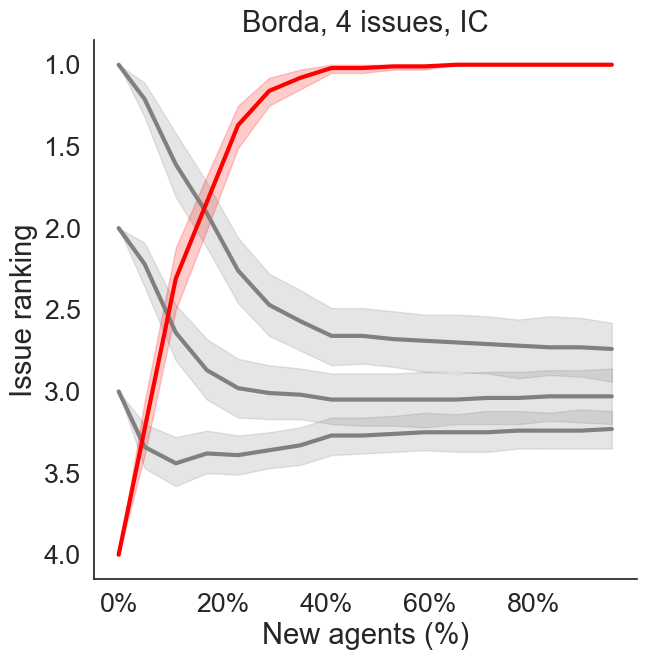

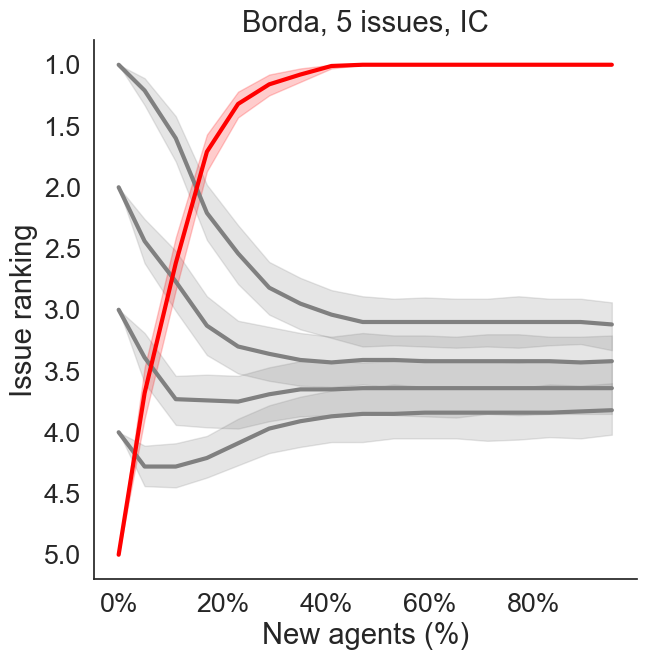

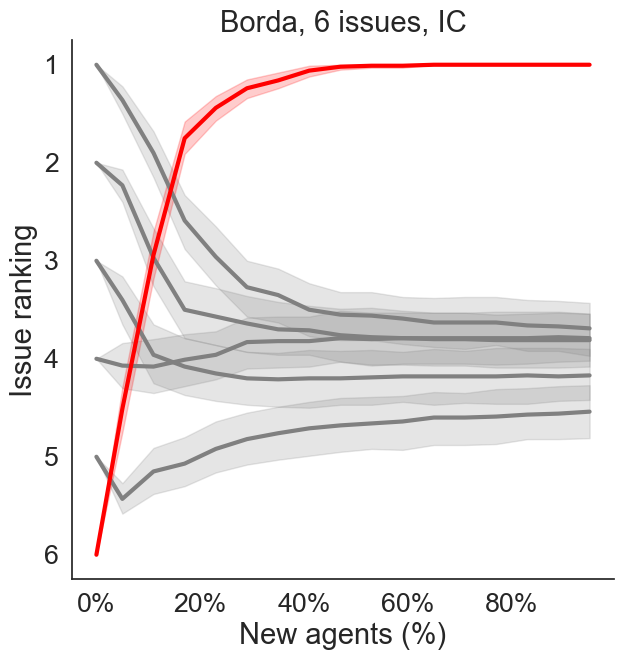

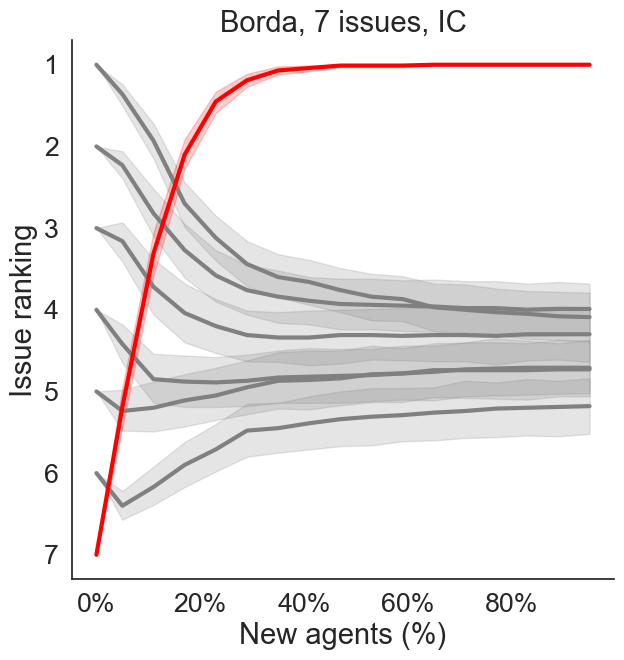

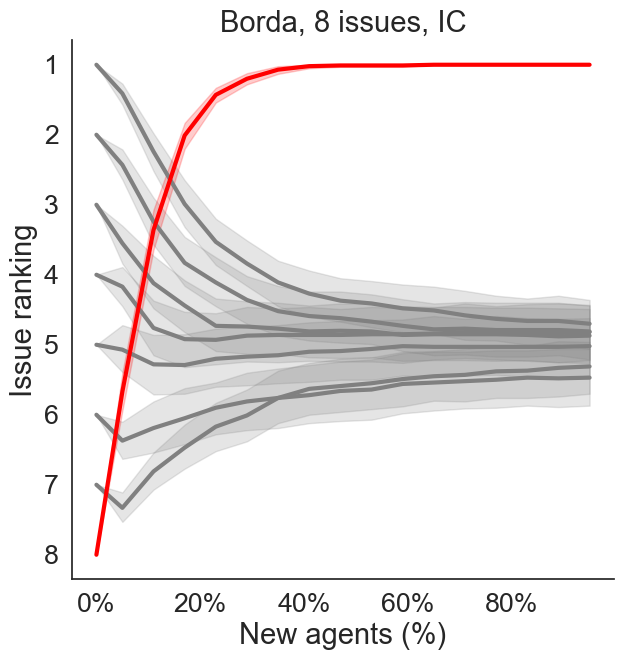

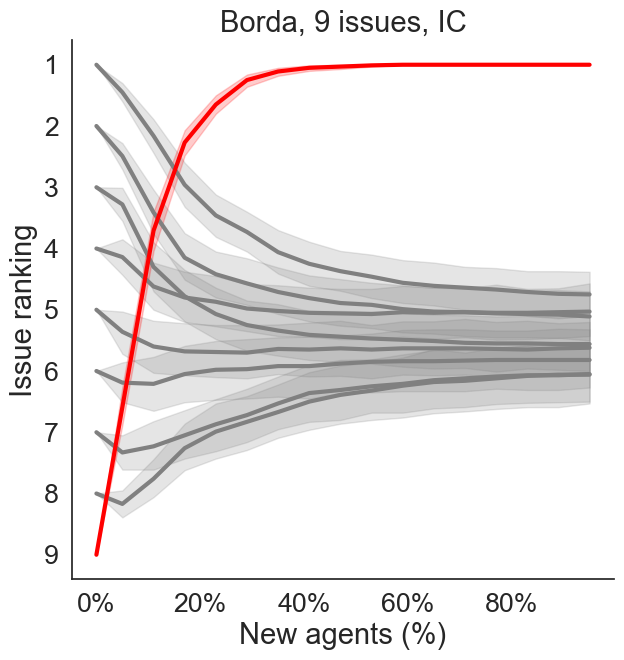

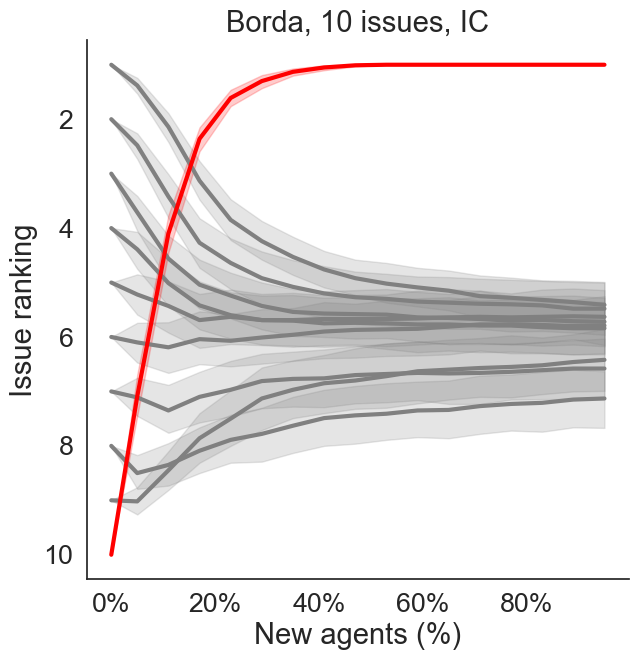

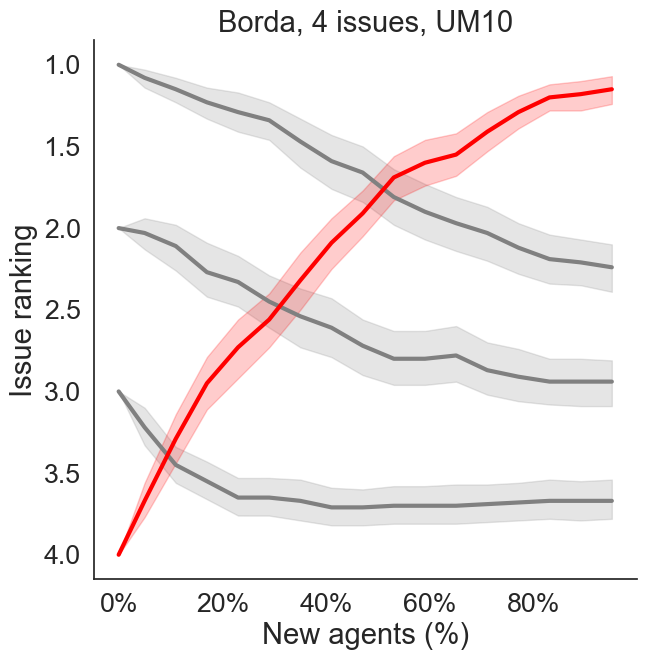

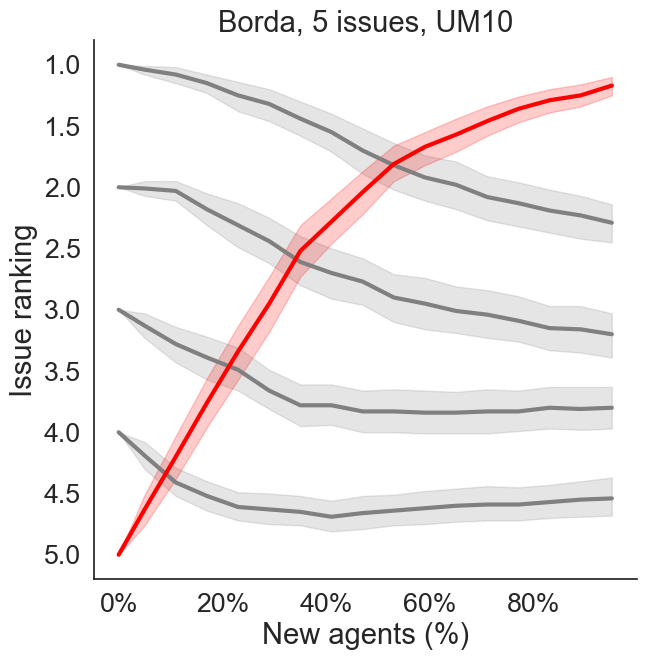

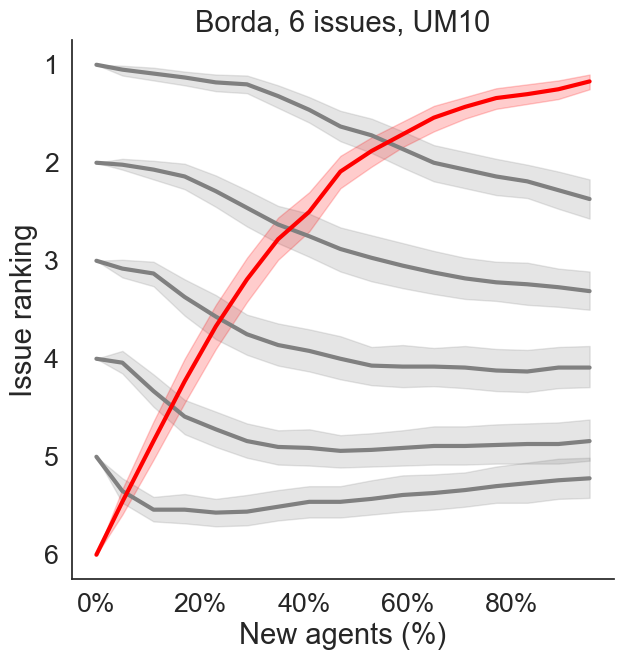

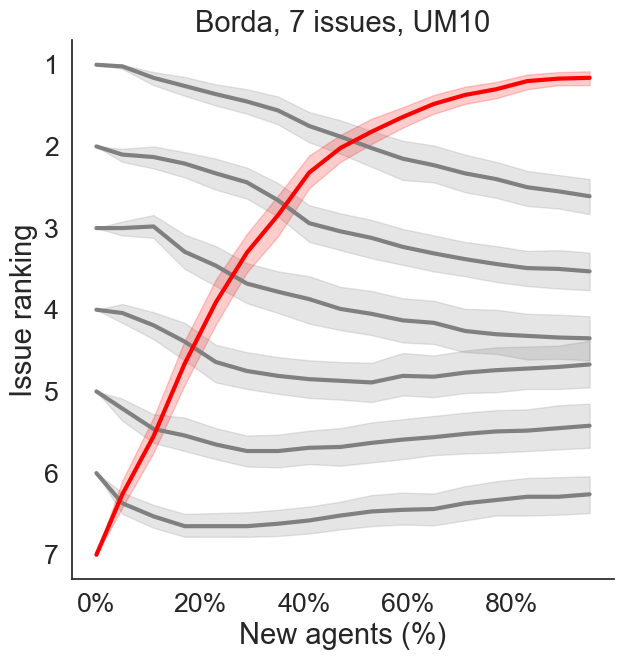

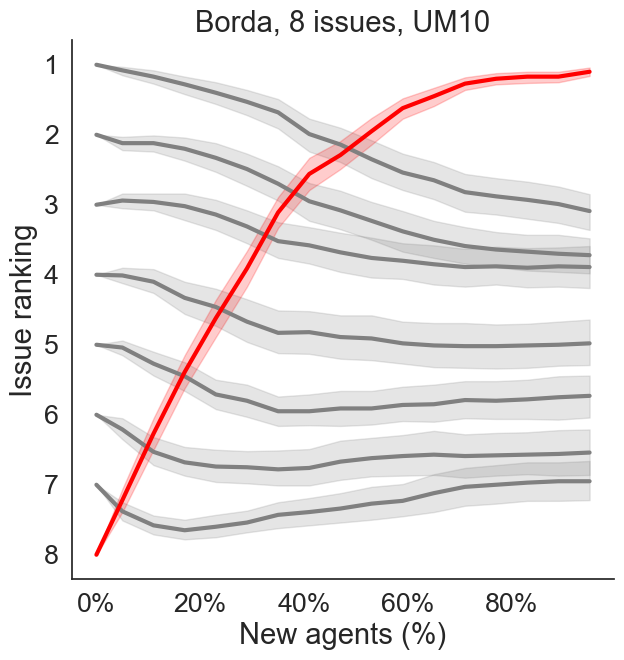

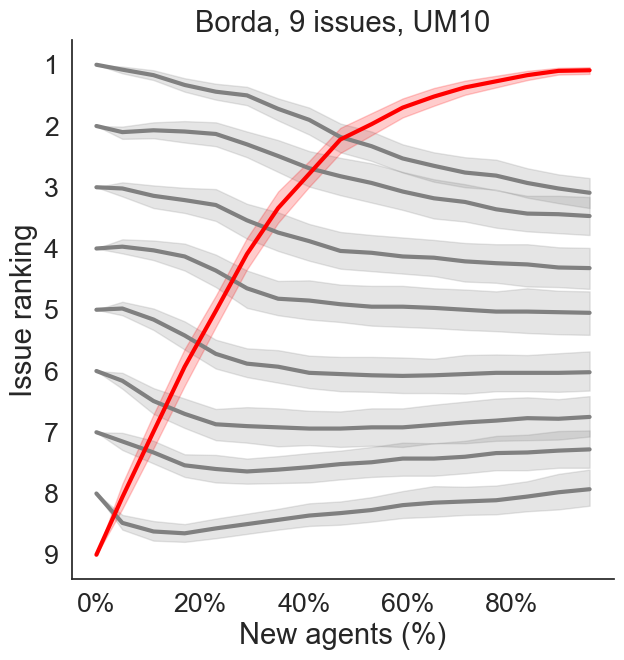

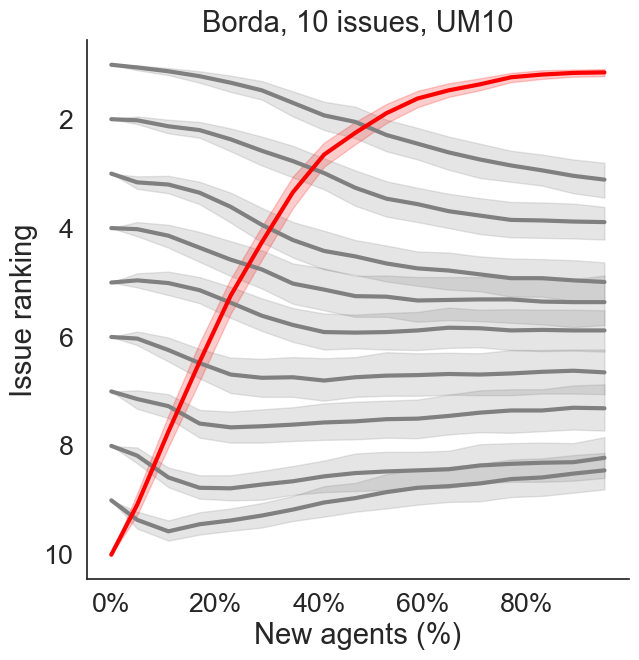

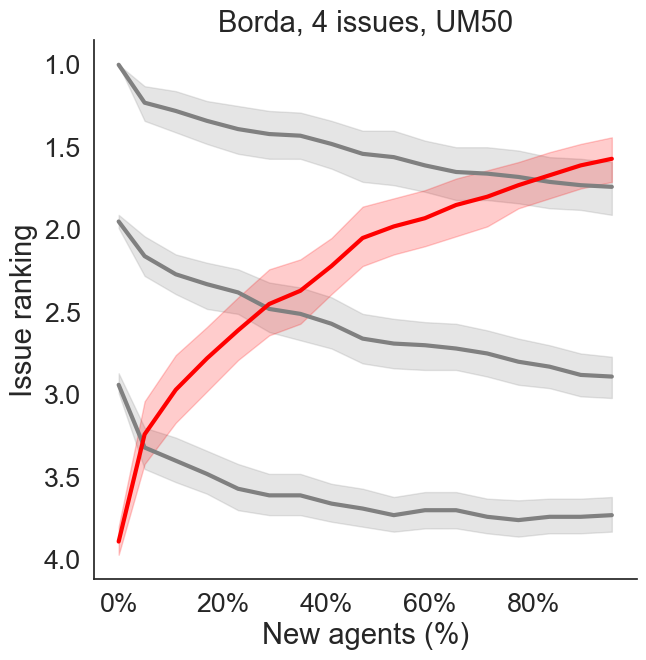

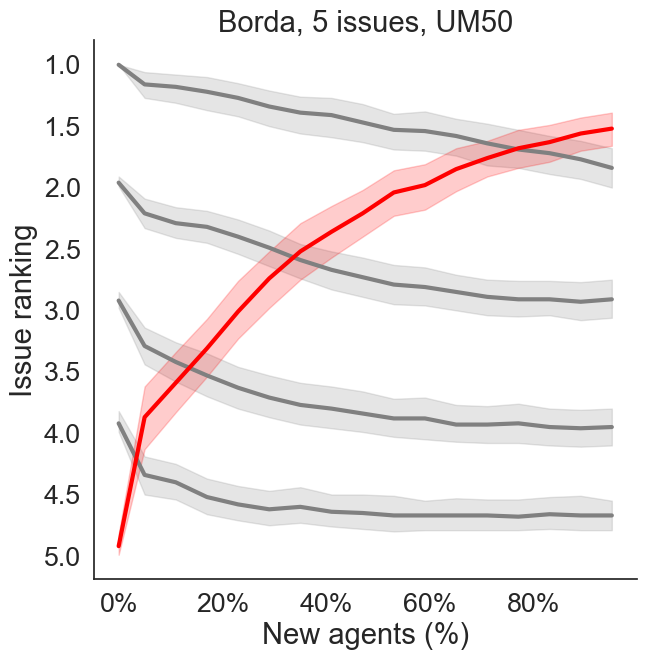

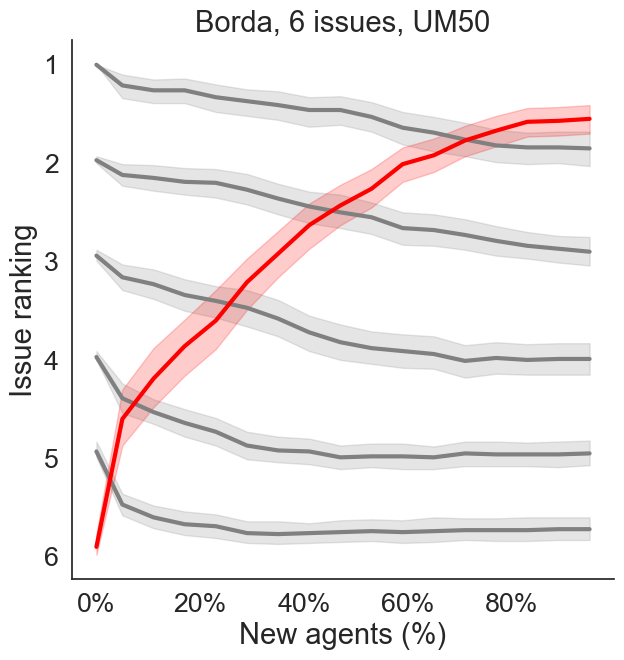

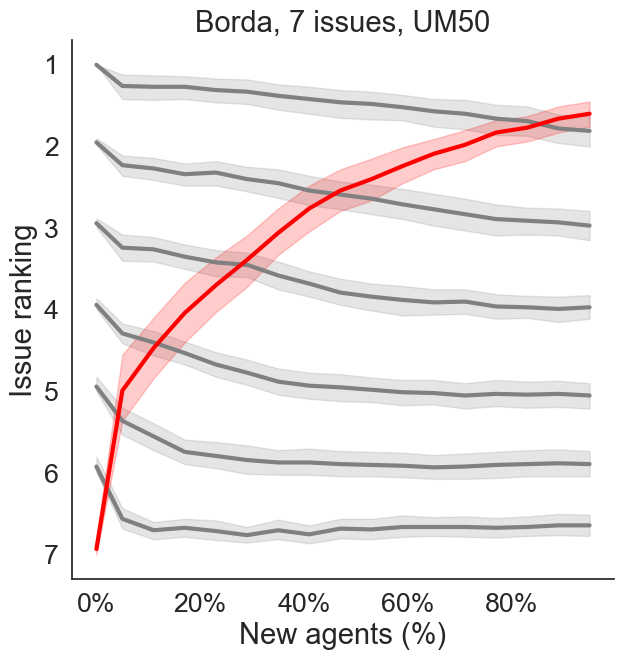

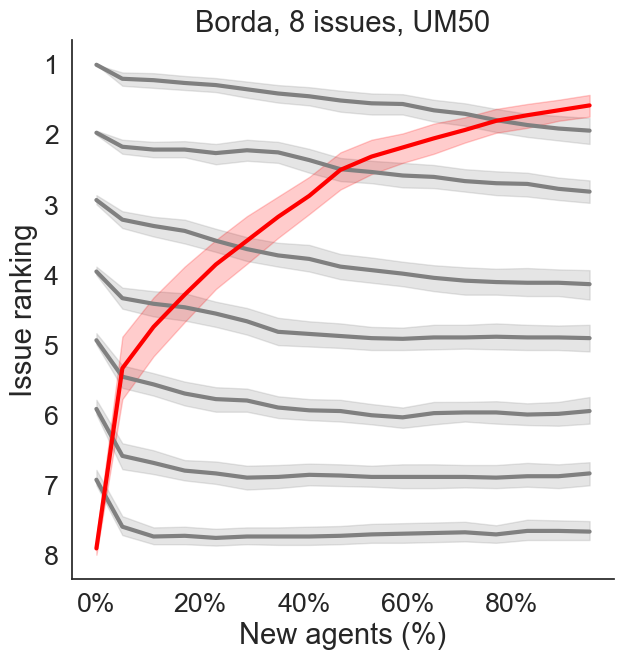

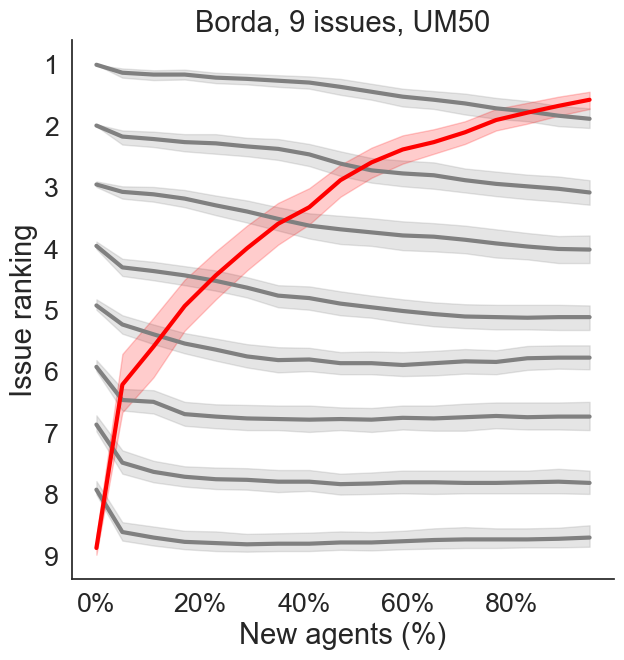

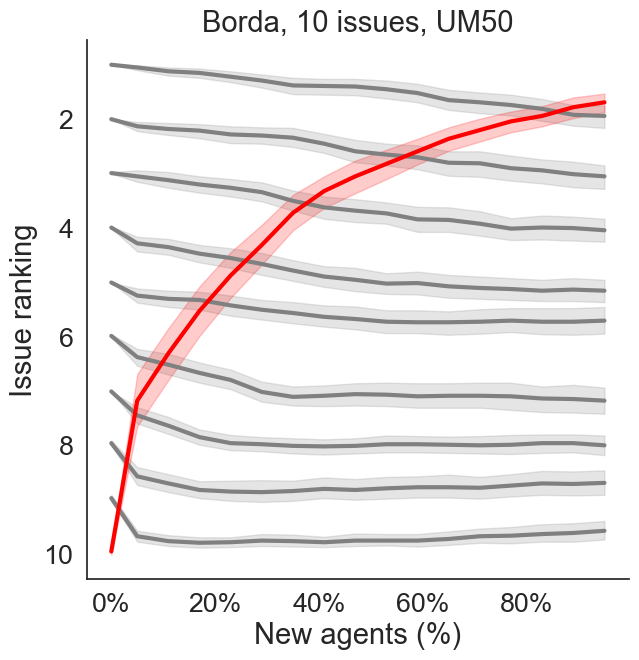

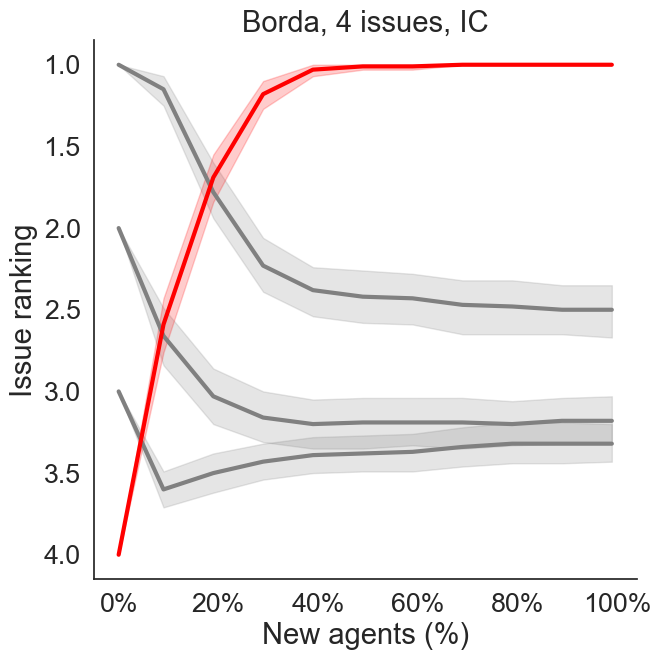

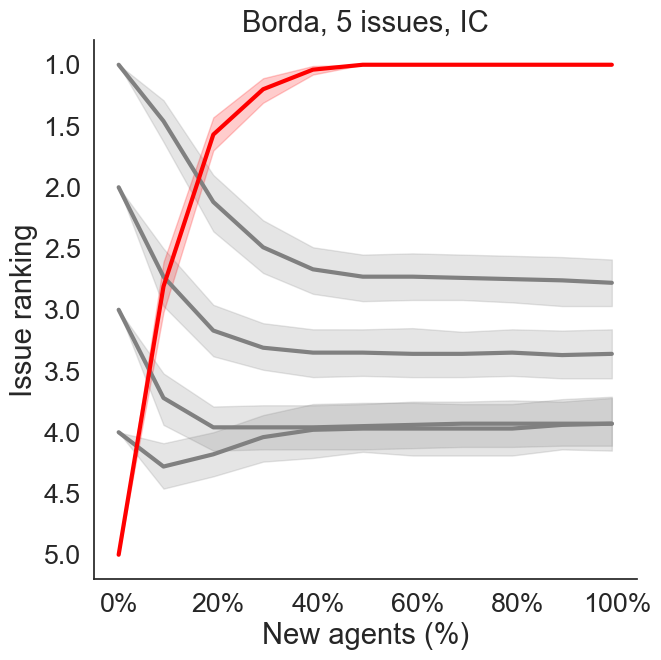

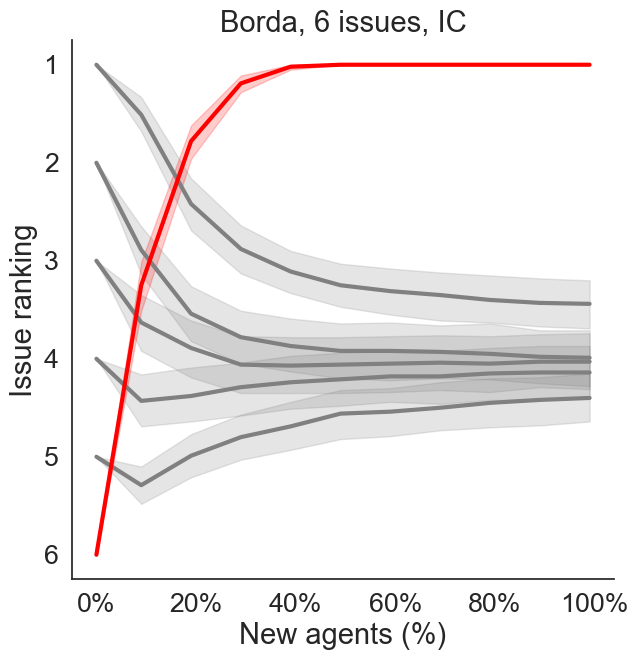

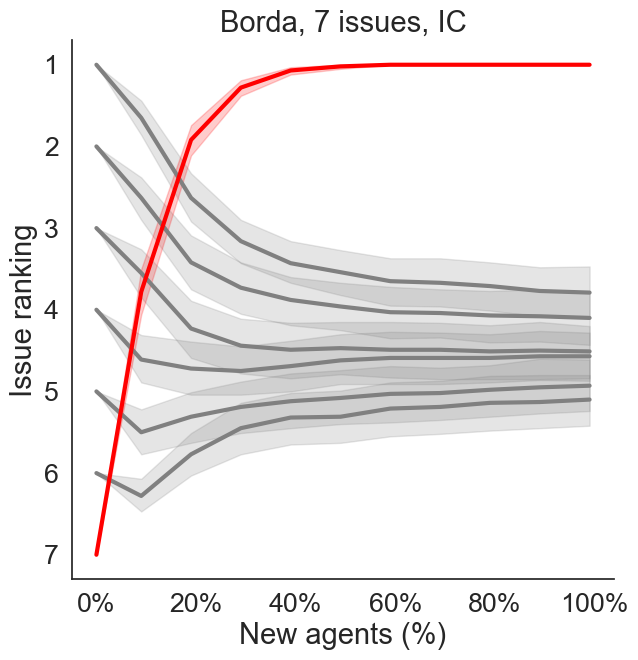

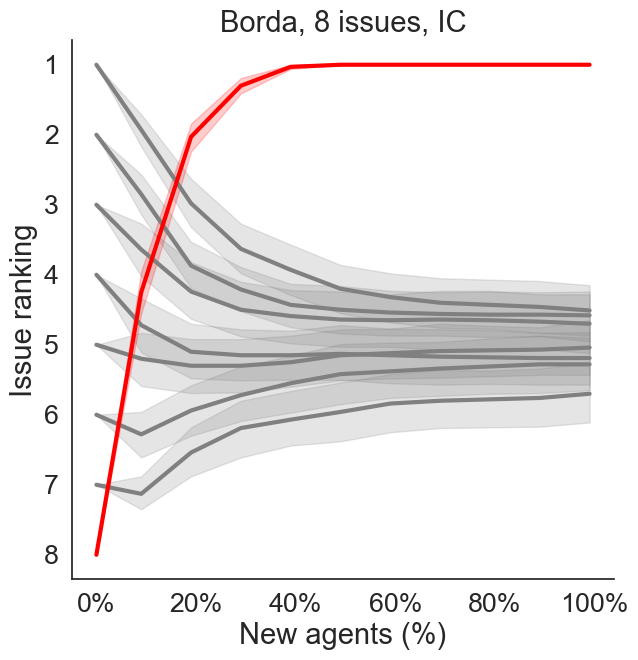

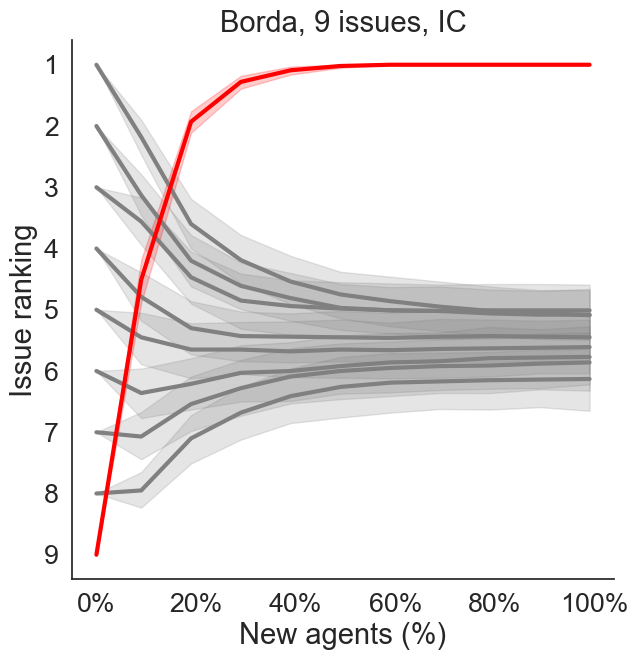

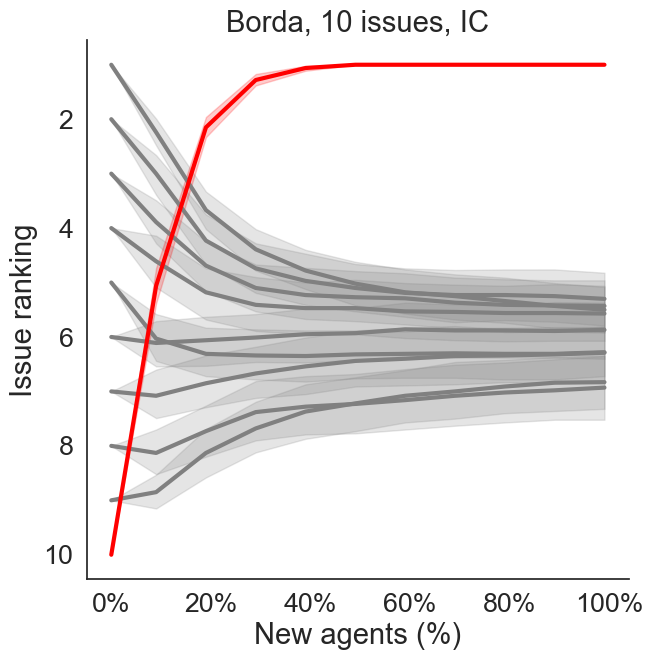

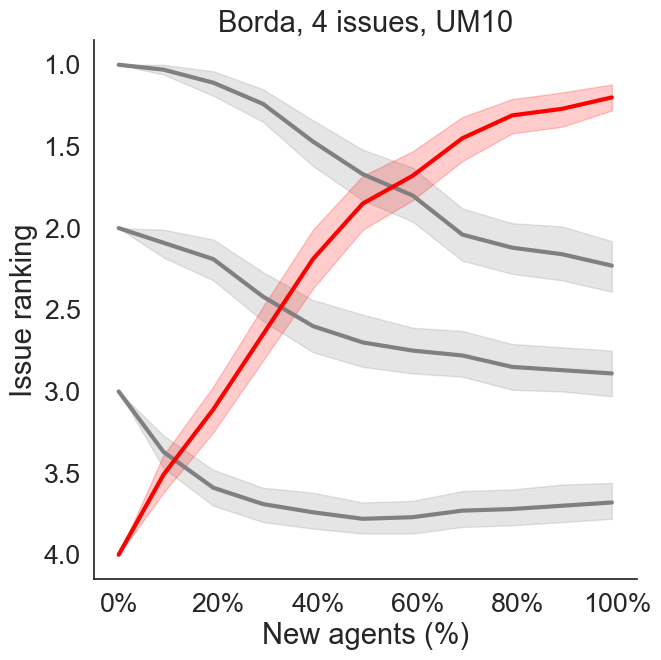

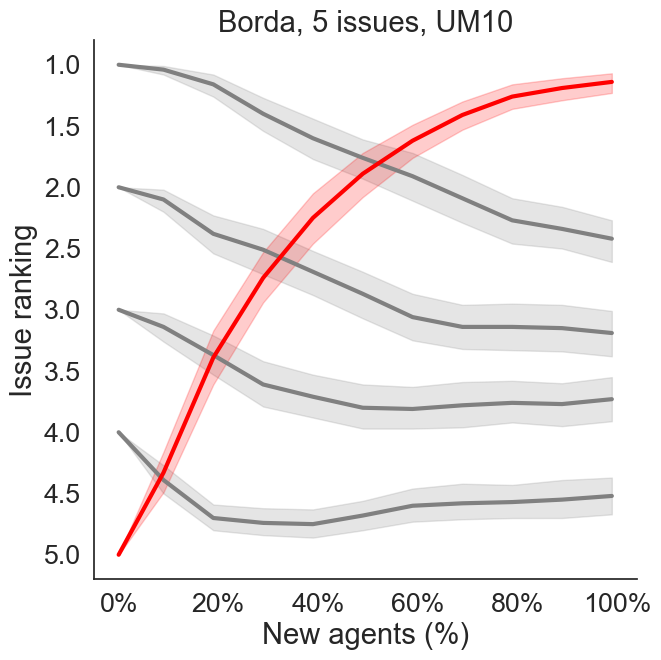

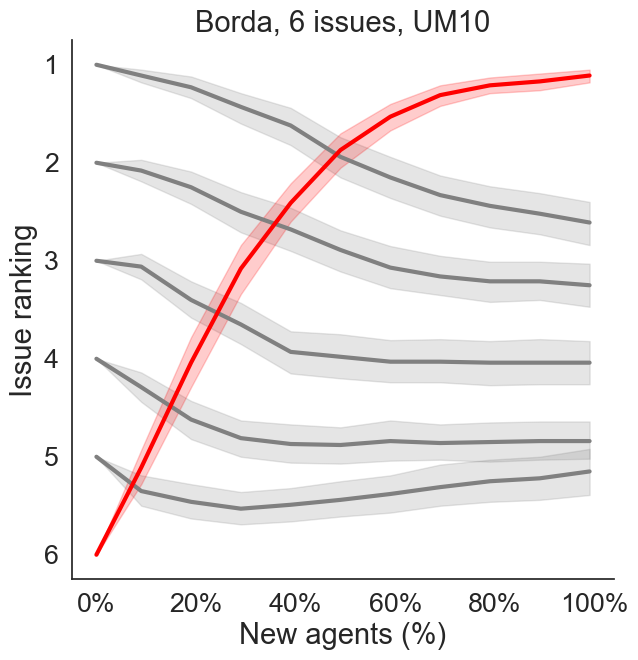

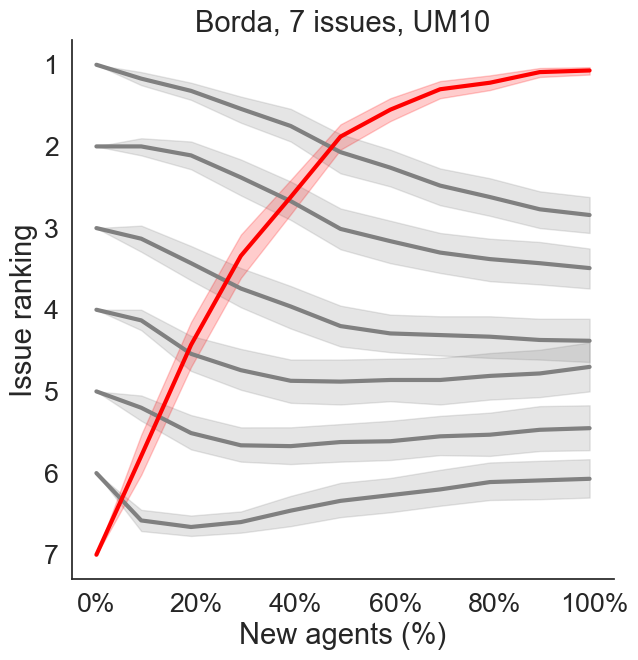

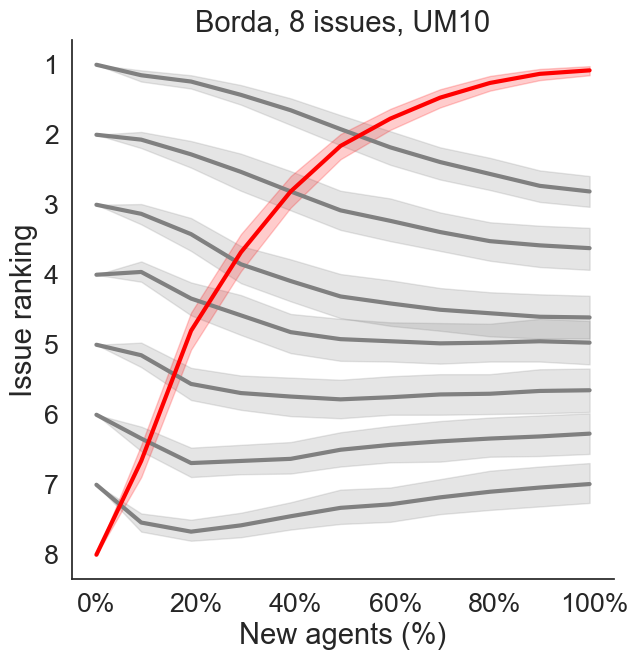

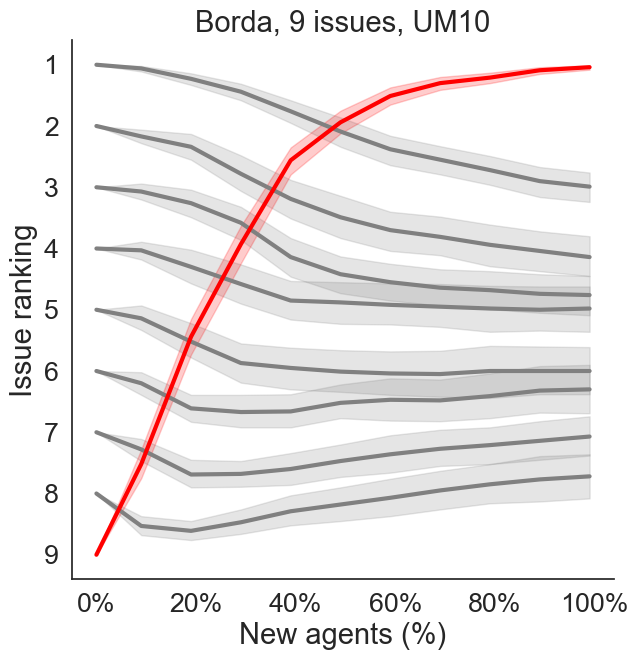

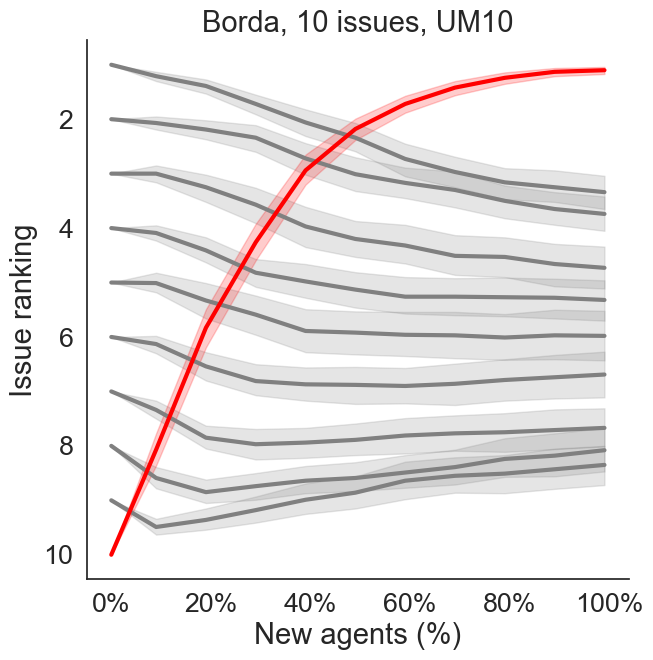

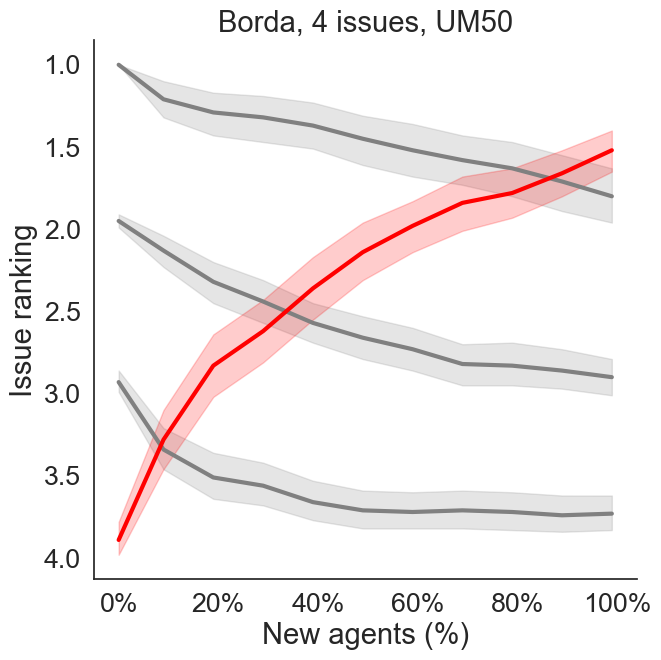

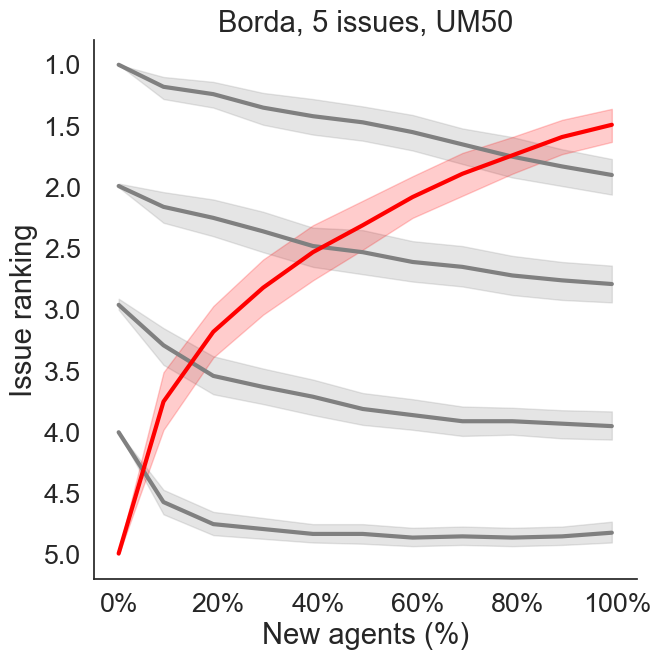

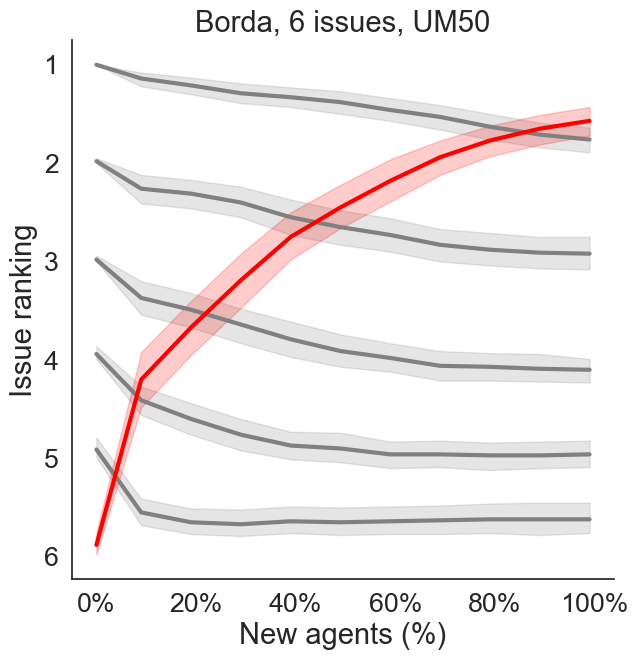

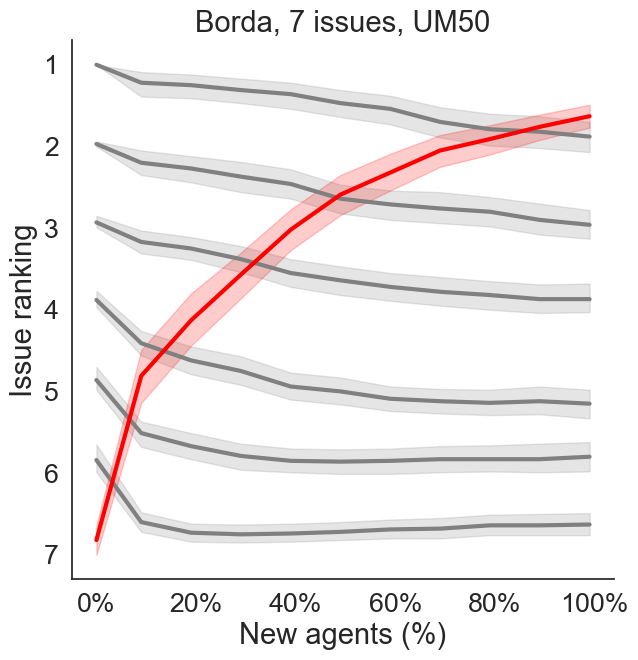

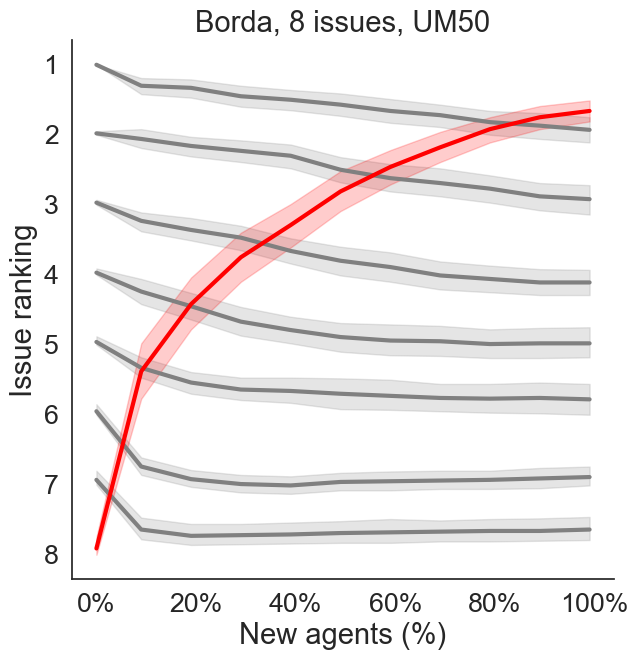

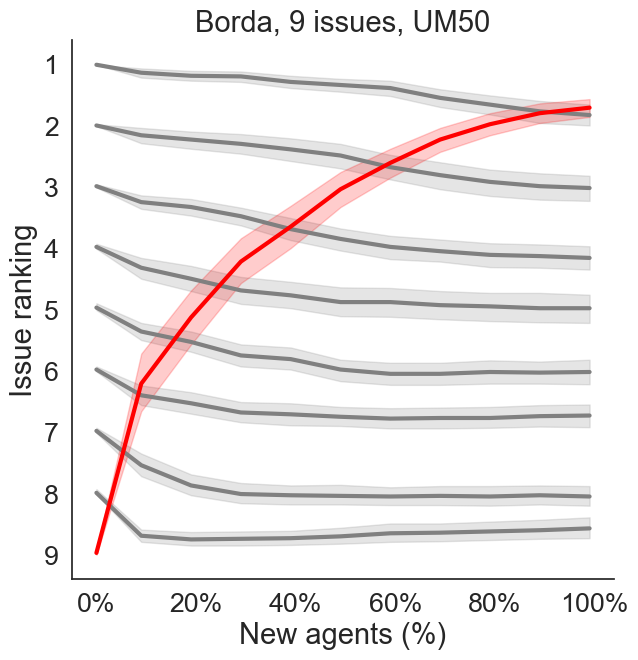

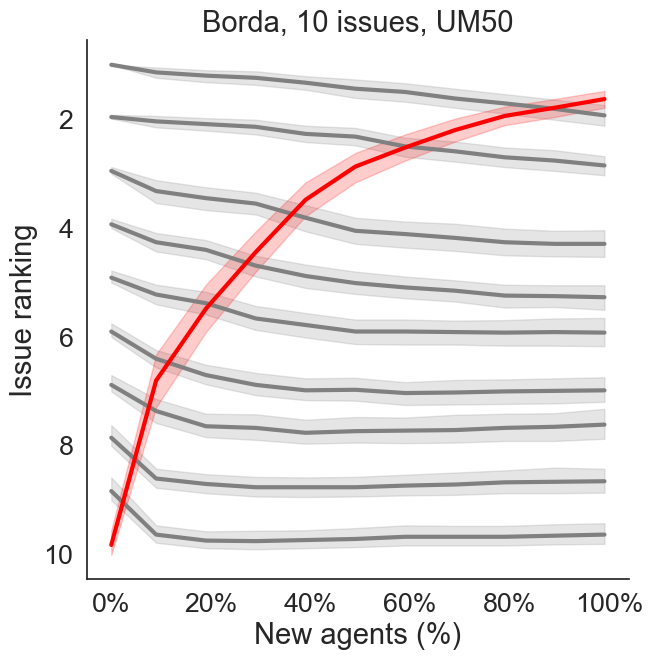

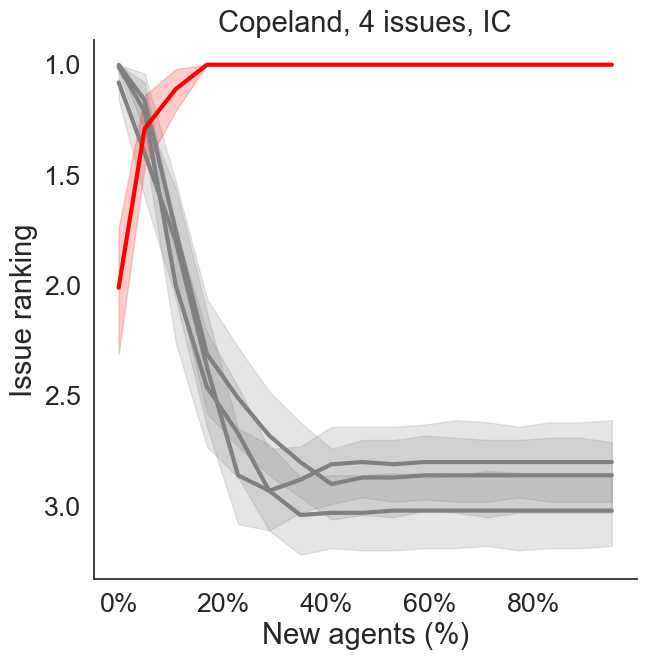

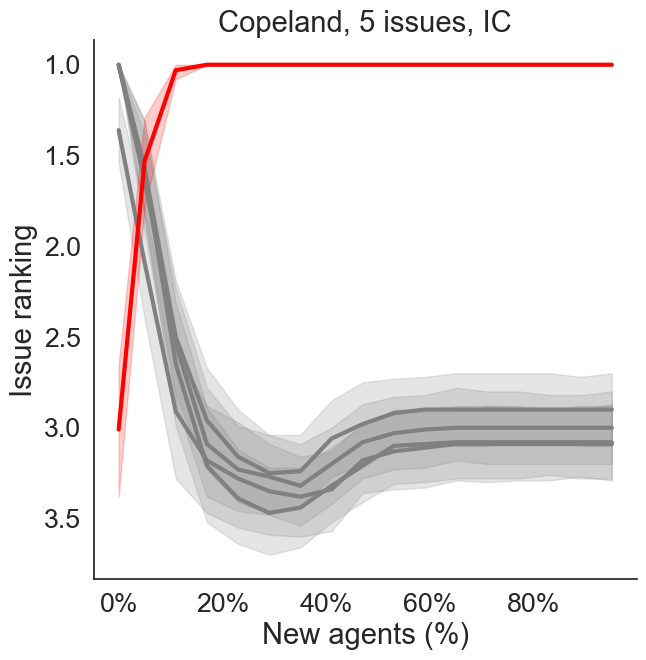

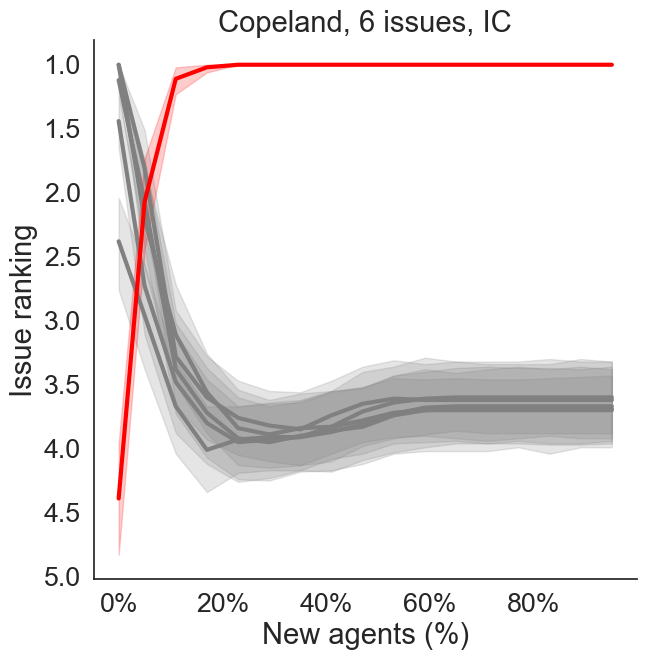

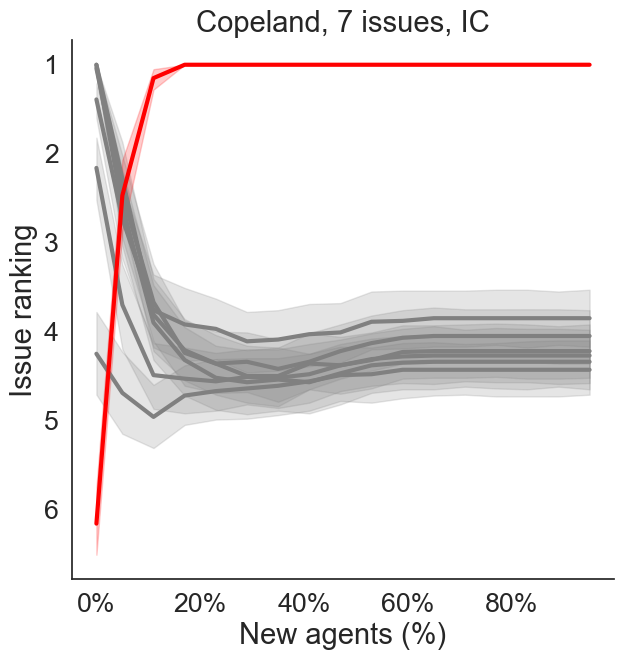

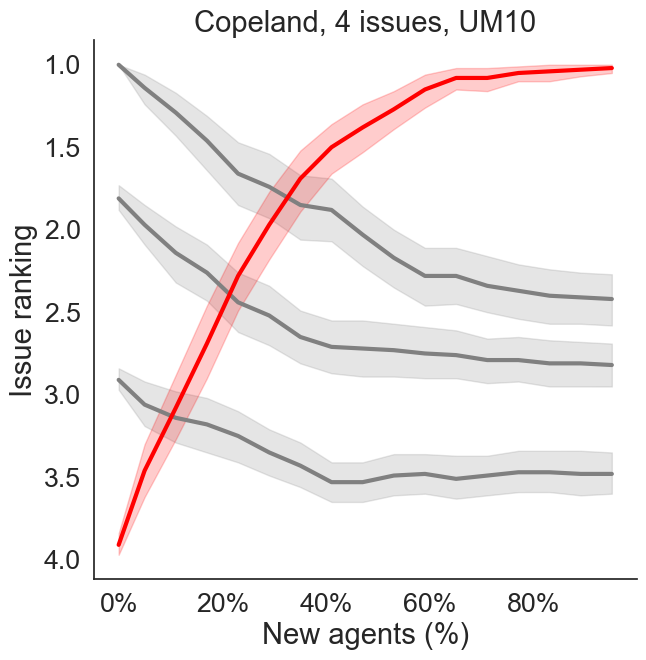

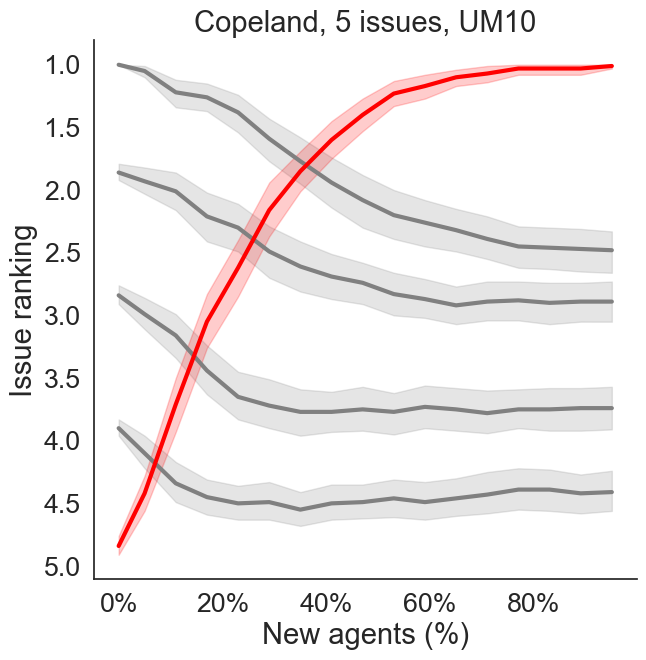

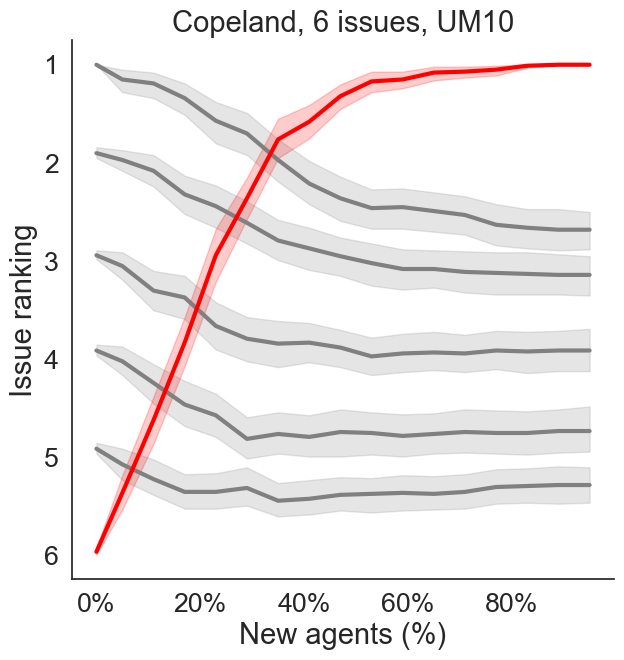

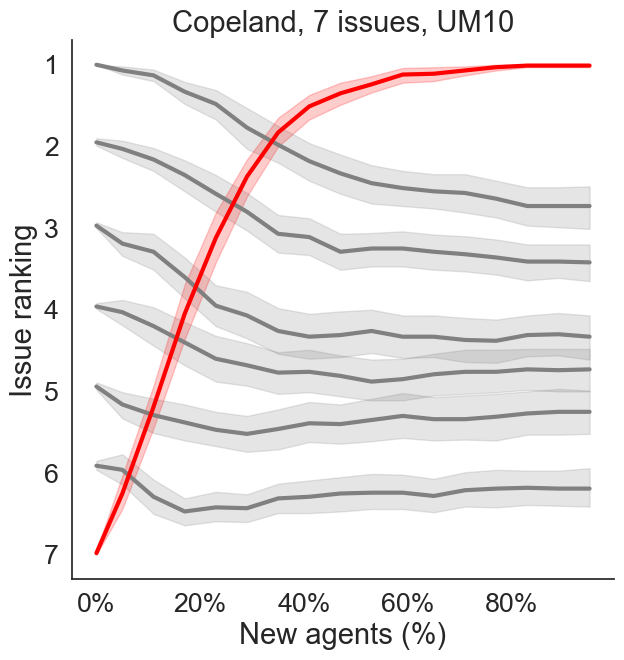

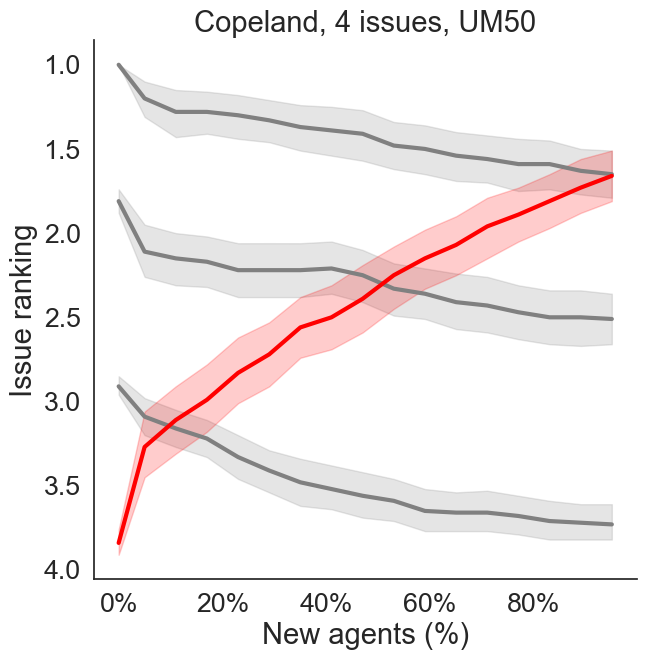

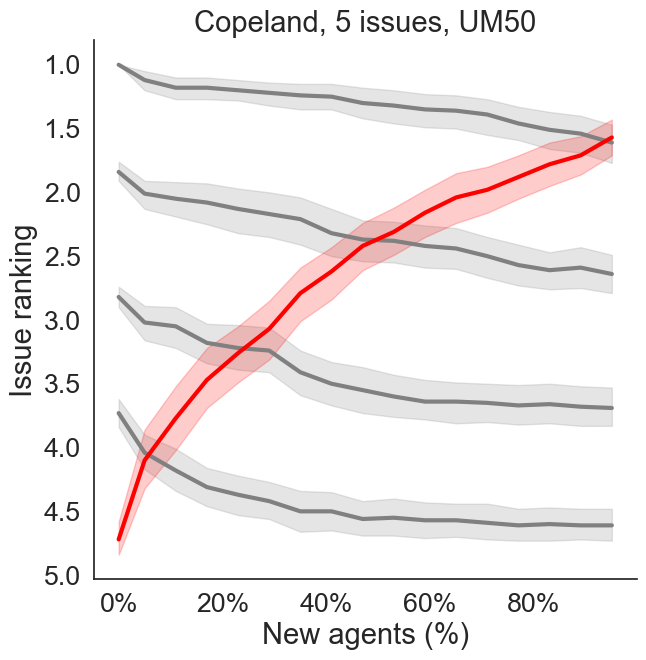

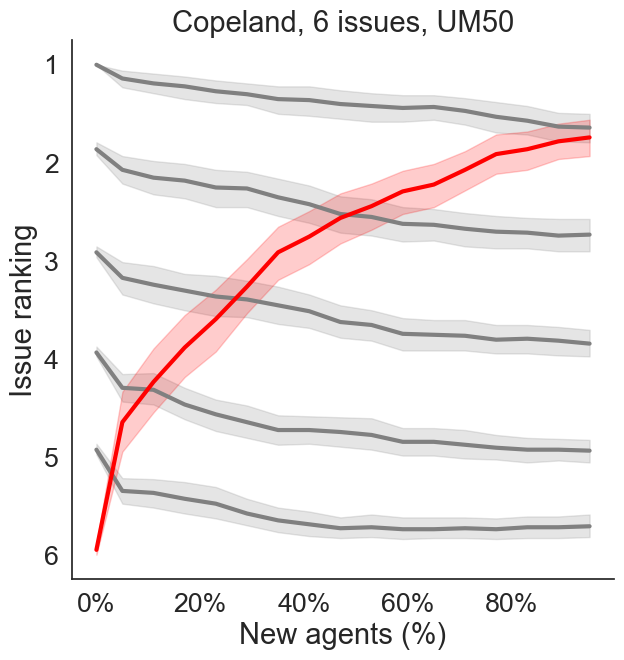

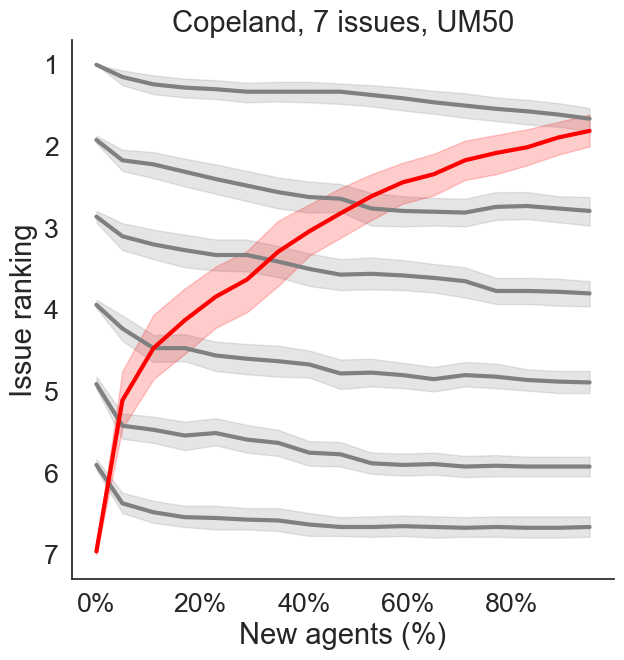

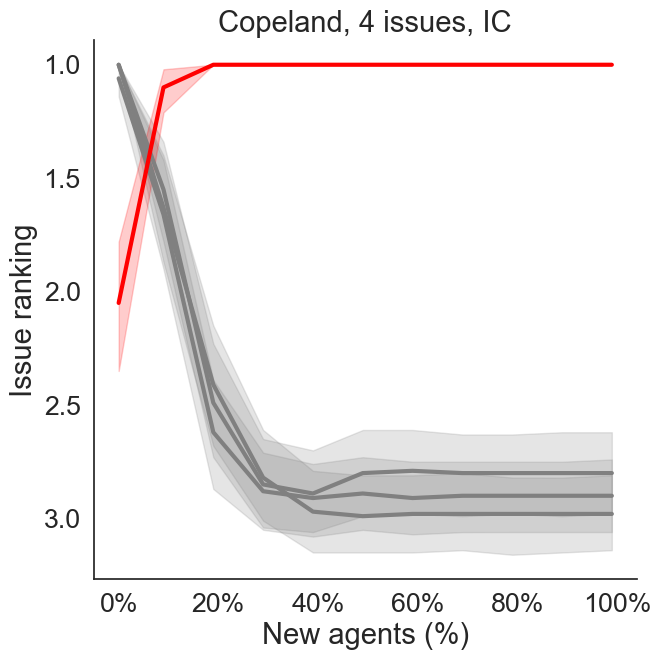

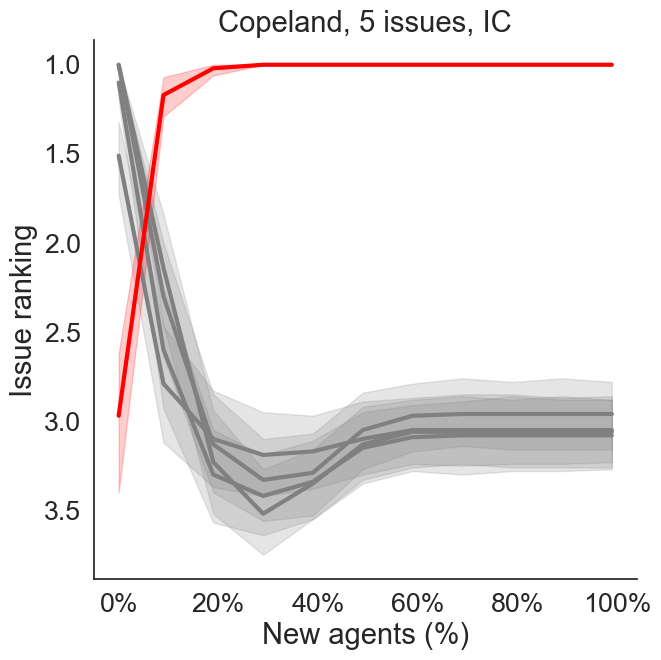

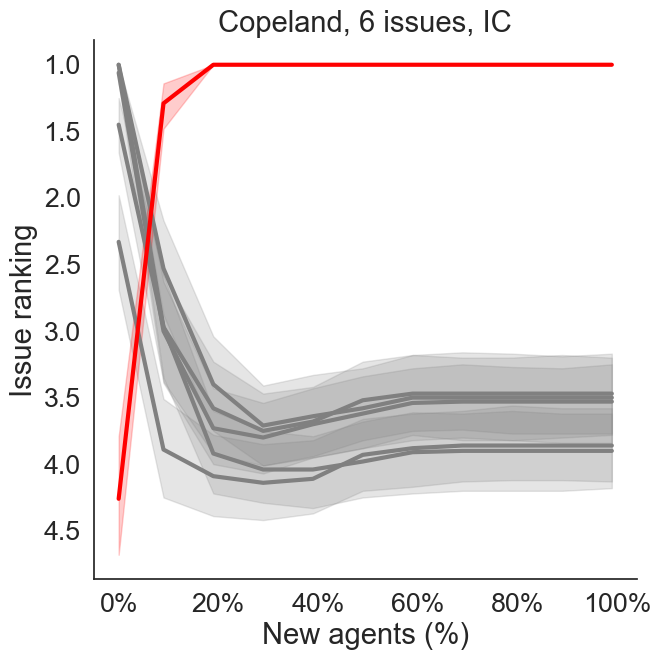

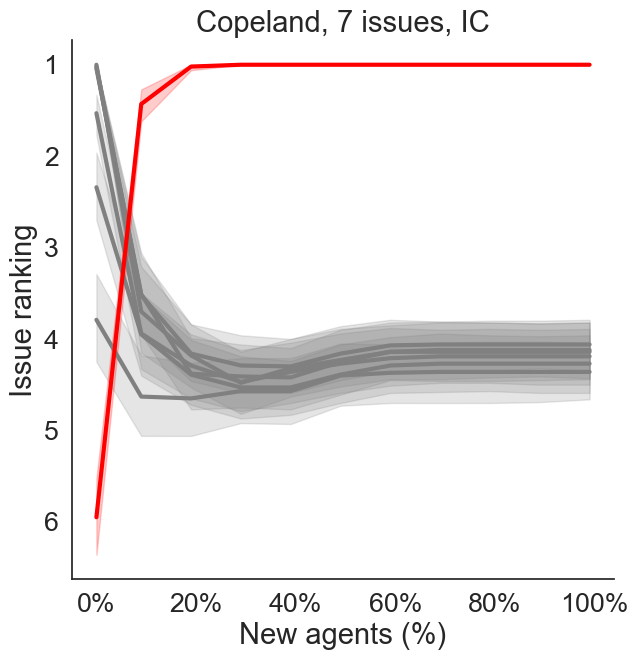

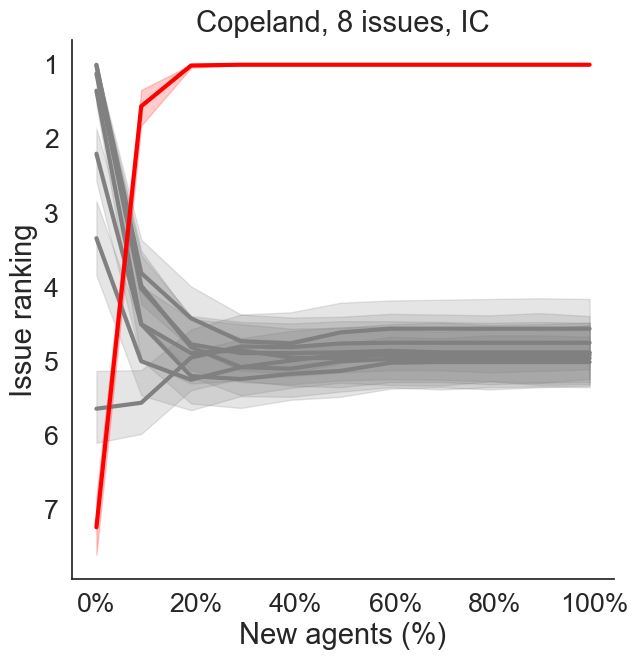

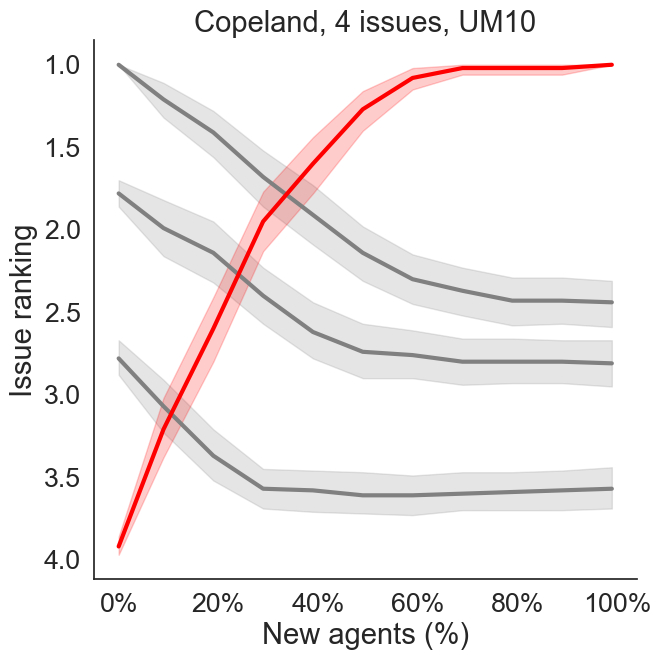

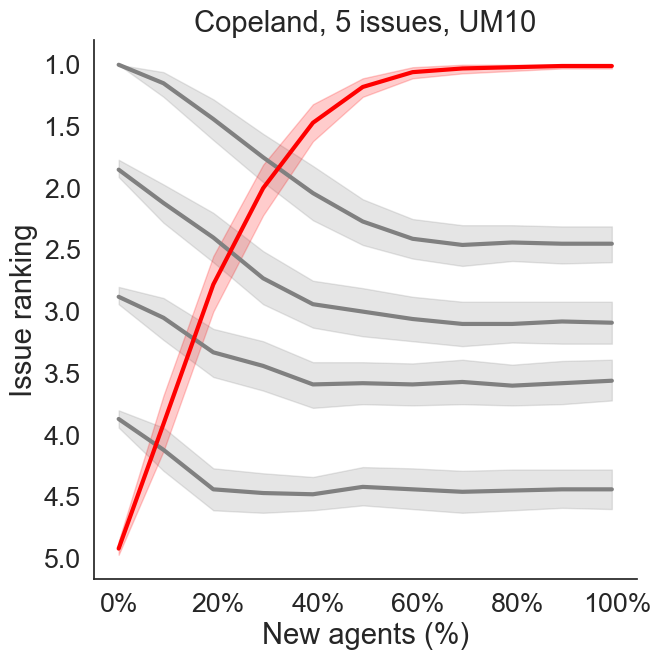

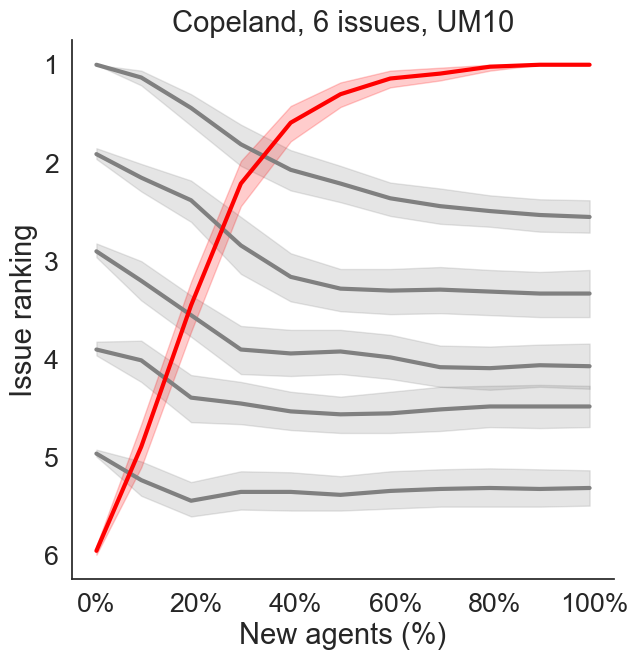

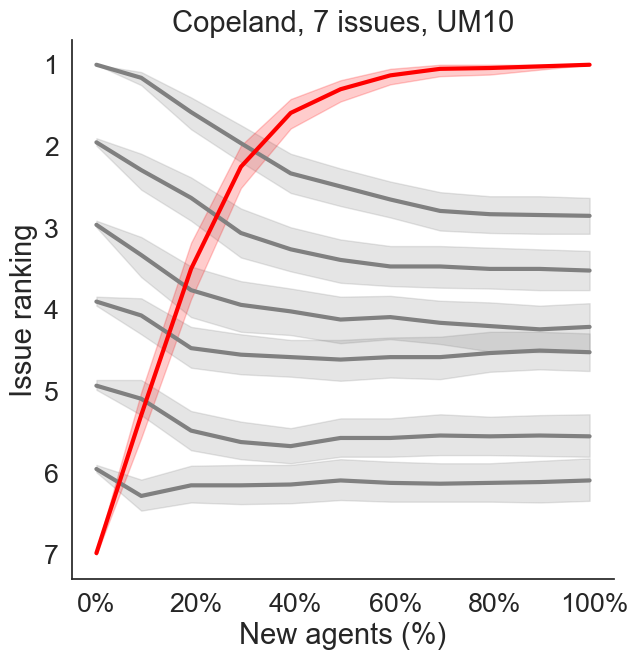

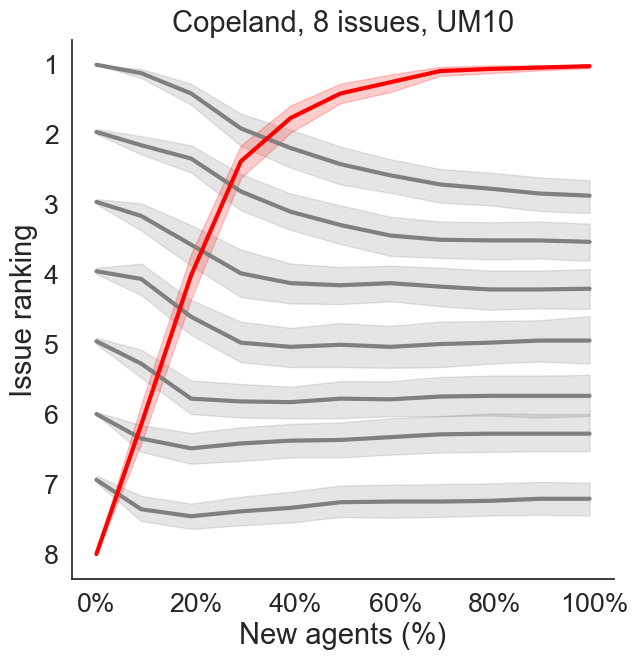

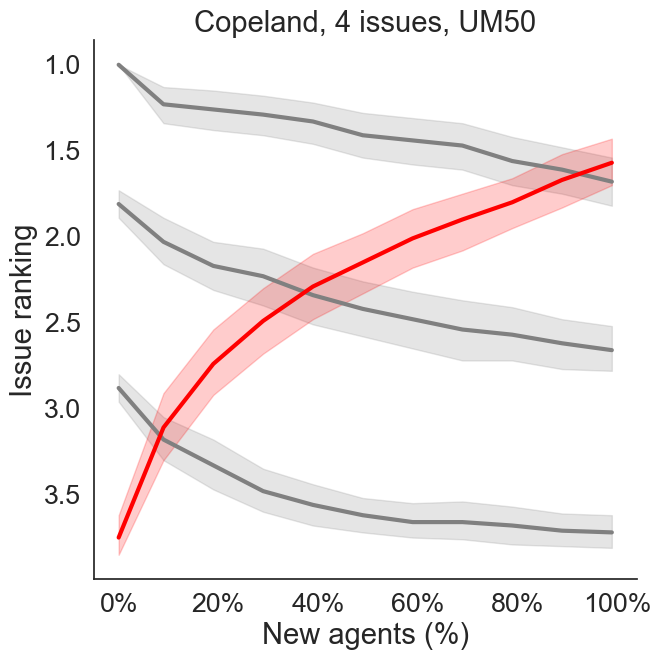

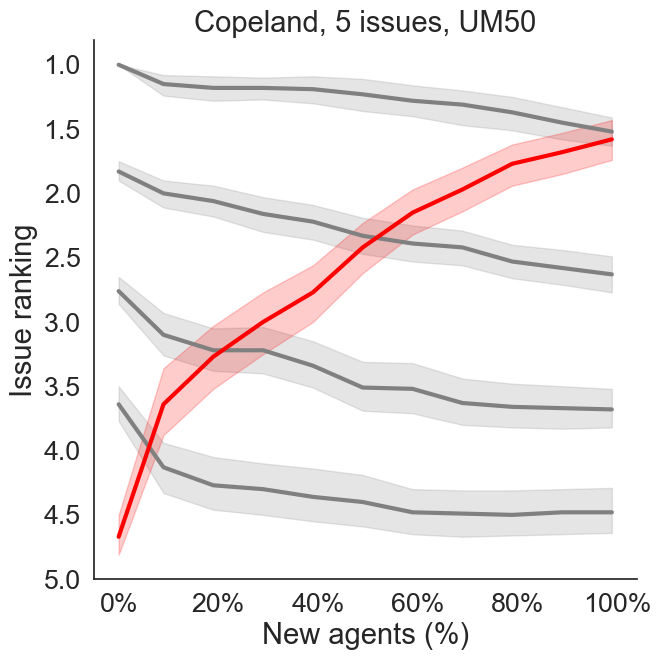

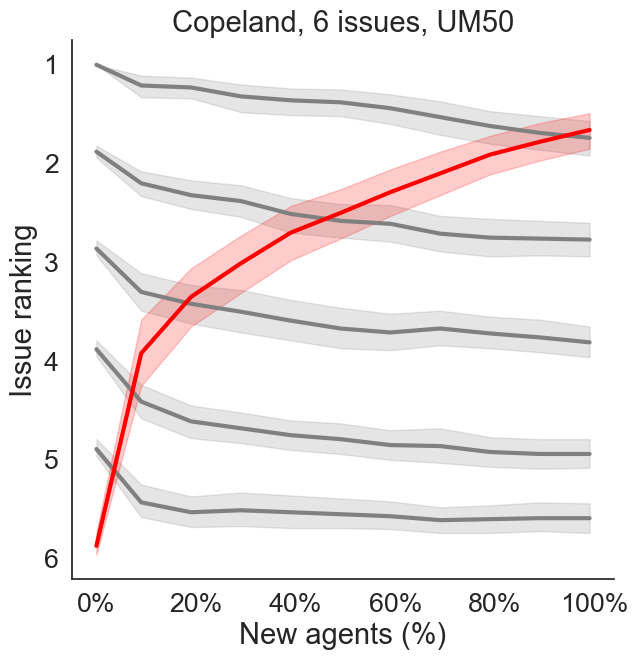

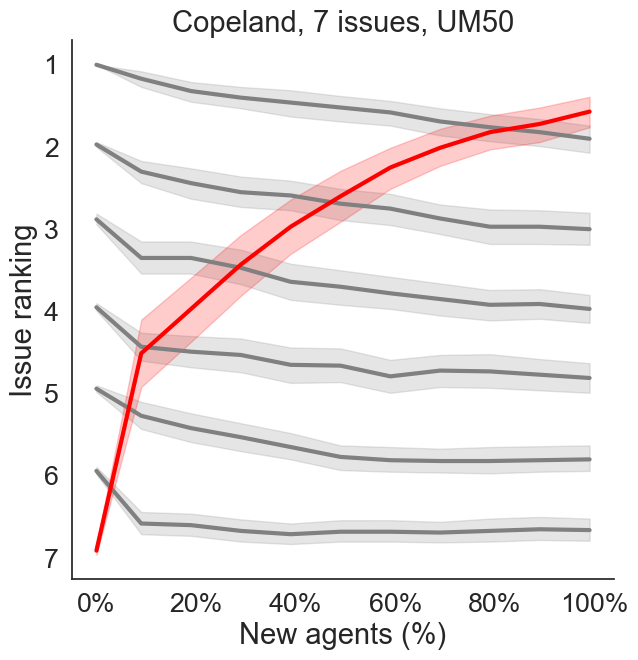

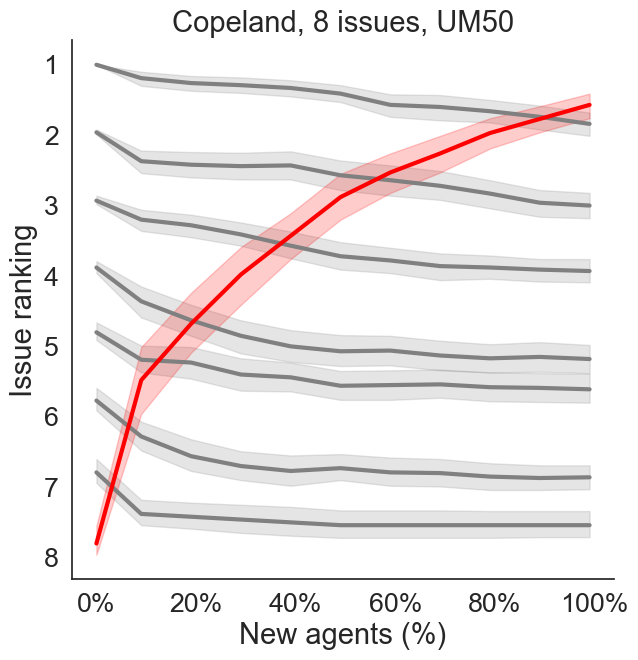

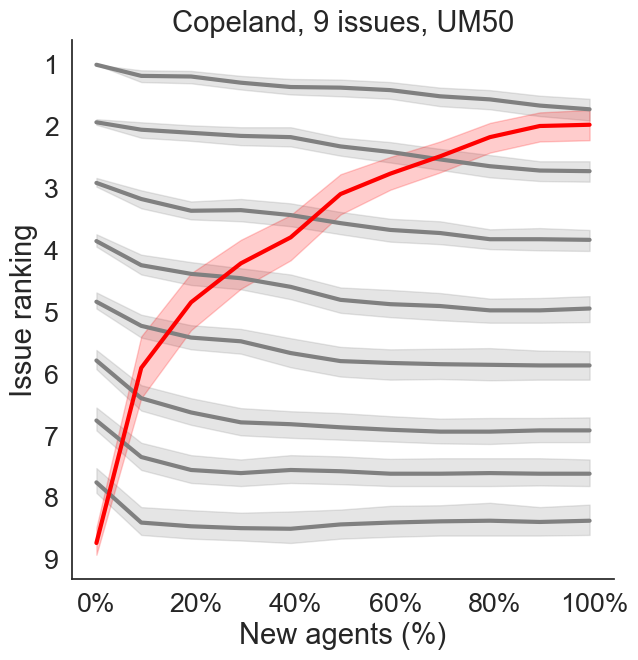

In [ ]:
n_alternatives = 8
method = "IC"
voting = "borda"
step = 6
for voting in ["borda", "copeland"]:
    for step in [6, 10]:
        for method in ["IC", "UM10", "UM50"]:
            for n_alternatives in range(4, 11):
                try:
                    df1 = pd.read_csv(f"data/{voting}_{method}_{n_alternatives}_alternatives_100_iterations_step_{step}.csv")
                    df1["percentage"] = (df1["size"] - 100) / 100

                    df1 = df1[df1["starting_id"] == n_alternatives]
                    fig, ax = plt.subplots(figsize=(7, 7))
                    palette = {c:"red" if c==n_alternatives else "grey" for c in df1.custom_id.unique()}

                    g = sns.lineplot(
                        x="percentage",
                        y="rank",
                        palette=palette,
                        hue="custom_id",
                        lw=3,
                        data=df1,
                        legend=False,
                        ax=ax
                    )

                    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
                    ax.set_xlabel("New agents (%)")
                    ax.set_ylabel("Issue ranking")
                    ax.set_title(f"{voting.title()}, {n_alternatives} issues, {method}")
                    ax.invert_yaxis()
                    sns.despine()
                    
                    plt.savefig(f"figures/fig3_{n_alternatives}_{method}_issues_{voting}_each_{step}_new_agents.pdf", bbox_inches="tight")
                    
                except:
                    pass

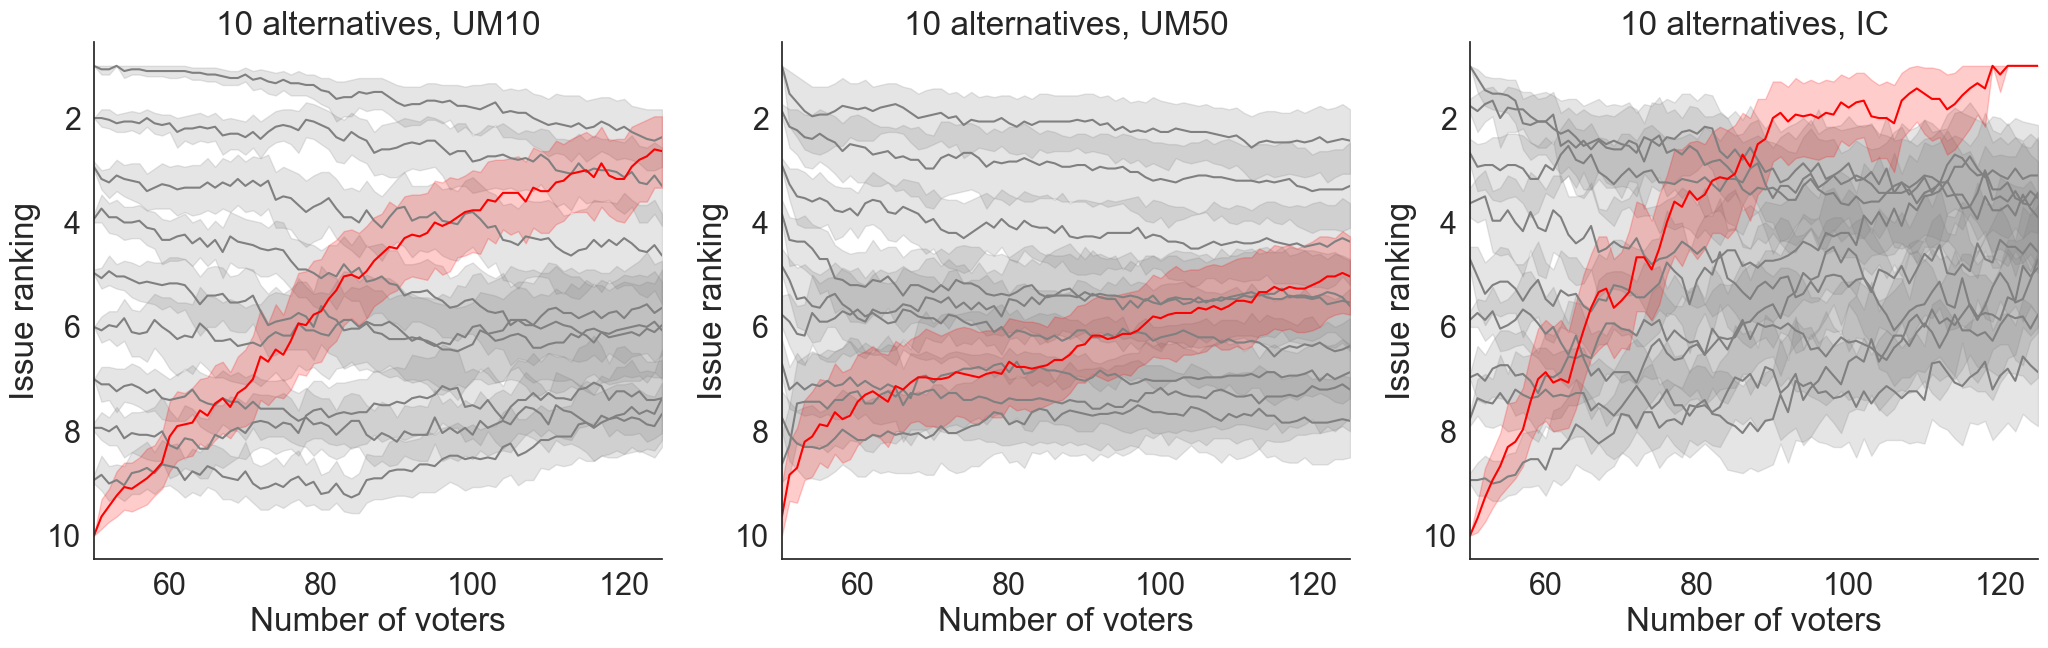

In [ ]:
sns.set(font_scale=2, style="white")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
for i, item in enumerate([(df1, "UM10"), (df2, "UM50"), (df3, "IC")]):
    data, _type = item
    n_alternatives = data["n_alternatives"].unique()[0]
    ax = axs[i]
    palette = {c:"red" if c==n_alternatives else "grey" for c in data.custom_id.unique()}
    g = sns.lineplot(
        x="size",
        y="rank",
        palette=palette,
        hue="custom_id",
        data=data,
        legend=False,
        ax=ax
    )

    ax.set_xlabel("Number of voters")
    ax.set_ylabel("Issue ranking")
    ax.set_title(f"{n_alternatives} alternatives, {_type}")
    ax.invert_yaxis()
    ax.margins(x=0)

fig.tight_layout()

sns.despine()

In [ ]:
def get_data(
    model="IC",
    n_alternatives=7,
    voting="borda",
    step=10
):
    df = pd.read_csv(f"data/{voting}_{model}_{n_alternatives}_alternatives_100_iterations_step_{step}.csv")
    df["percentage"] = (df["size"] - 100) / 100

    df1 = df[df["starting_id"] == 2]
    df2 = df[df["starting_id"] == math.ceil(n_alternatives/2)]
    df3 = df[df["starting_id"] == n_alternatives]

    a1 = df1[df1["custom_id"] == 2]
    a2 = df2[df2["custom_id"] == math.ceil(n_alternatives/2)]
    a3 = df3[df3["custom_id"] == n_alternatives]

    df = pd.concat([a1, a2, a3])
    df["model"] = model
    return df

FileNotFoundError: [Errno 2] No such file or directory: 'data/copeland_IC_9_alternatives_100_iterations_step_10.csv'

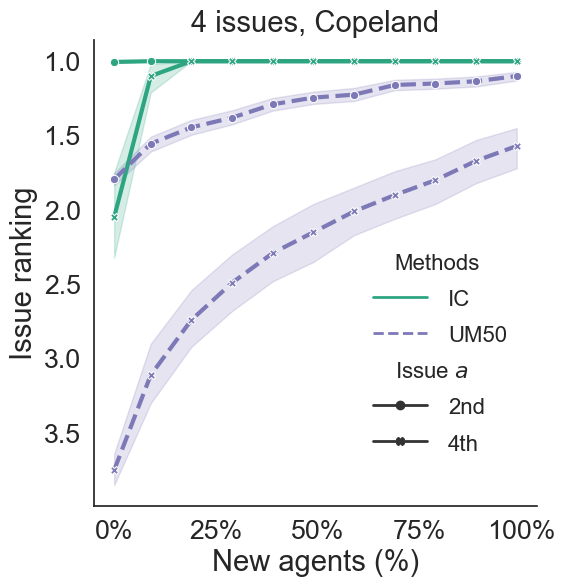

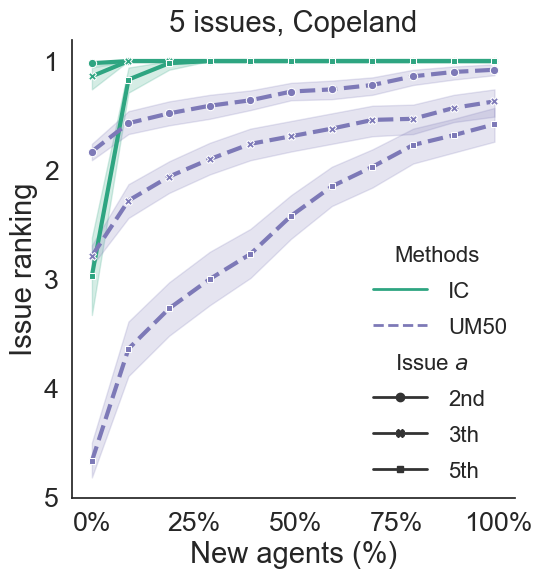

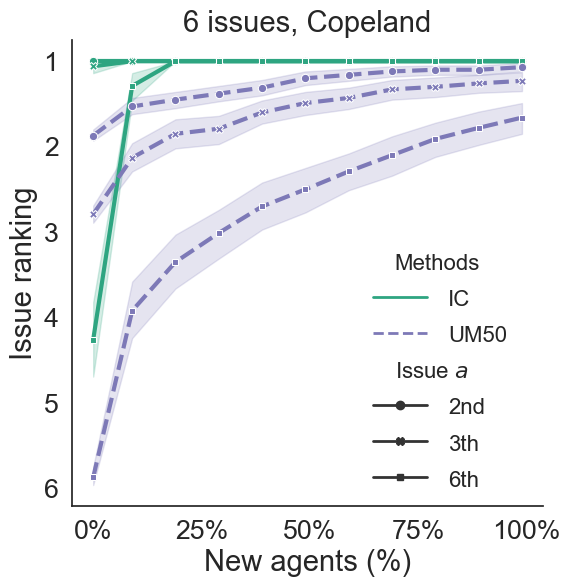

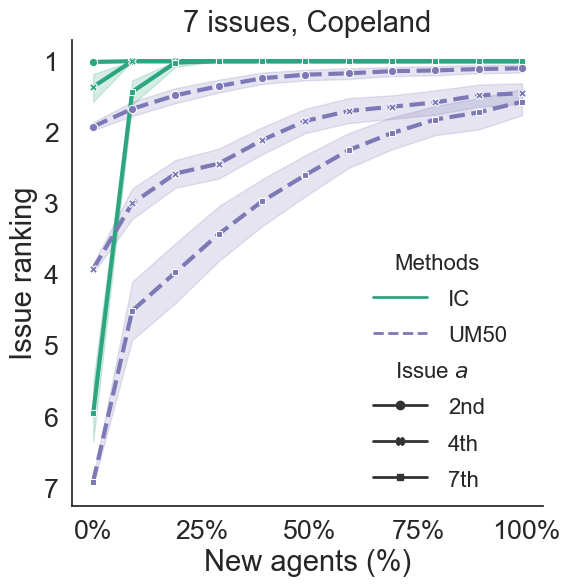

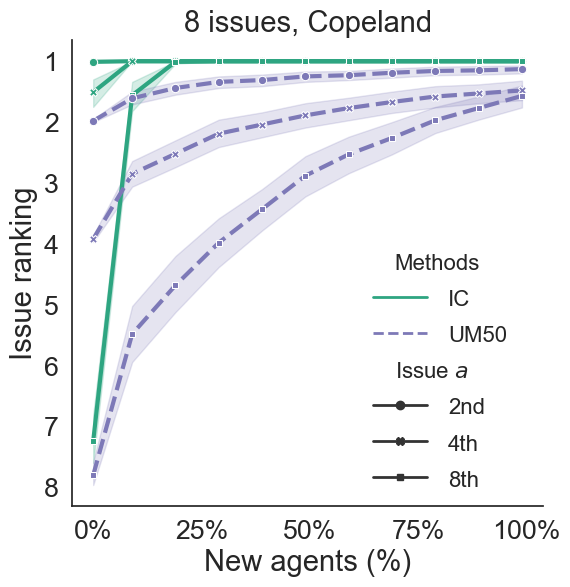

In [ ]:
# n_alternatives = 8
voting = "copeland"
step = 10

for n_alternatives in range(4, 11):
    df1 = get_data(model="IC", n_alternatives=n_alternatives, voting=voting, step=step)
    df2 = get_data(model="UM10", n_alternatives=n_alternatives, voting=voting, step=step)
    df3 = get_data(model="UM50", n_alternatives=n_alternatives, voting=voting, step=step)


    sns.set(font_scale=1.75, style="white")

    # fig, ax = plt.subplots(figsize=(7, 7))
    data = pd.concat([df1, df3])
    # data = data.rename(columns={"custom_id": "Issue $a$", "model"})
    n_alternatives = data["n_alternatives"].unique()[0]
    palette = {c:"red" if c==n_alternatives else "grey" for c in data.custom_id.unique()}
    g = sns.relplot(
        x="percentage",
        kind="line",
        dashes=False, markers=True,
        y="rank",
        # palette=palette,
        style="custom_id",
        hue="model",
        palette=["#2ea581", "#7d79b7"],
        lw=3,
        data=data,
        height=6,
        # legend=False,
        # ax=ax
    )
    ax = g.axes.flatten()[0]
    if n_alternatives > 4:
        ax.lines[3].set_linestyle("--")
        ax.lines[4].set_linestyle("--")
        ax.lines[5].set_linestyle("--")
        ax.lines[7].set_linestyle("--")
    else:
        ax.lines[2].set_linestyle("--")
        ax.lines[3].set_linestyle("--")
        ax.lines[5].set_linestyle("--")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax.set_title(f"{n_alternatives} issues, {voting.title()}")
    ax.set_xlabel("New agents (%)")
    ax.set_ylabel("Issue ranking")
    # ax.legend(title="Methods")
    sns.despine()
    # ax.margins(x=0)
    ax.invert_yaxis()

    g._legend.texts[0].set_text("Methods")
    # g._legend.set_title("New title")
    g._legend.texts[3].set_text("Issue $a$")

    g._legend.texts[4].set_text("2nd")
    if n_alternatives > 4:
        g._legend.texts[5].set_text(f"{math.ceil(n_alternatives/2)}th")
        g._legend.texts[6].set_text(f"{n_alternatives}th")
    else:
        g._legend.texts[5].set_text(f"{n_alternatives}th")

    fig.tight_layout()

    leg = g._legend
    leg.set_bbox_to_anchor([0.45, 0.6])  # coordinates of lower left of bounding box
    leg._loc = 2  # if required you can set the loc
    plt.setp(leg.get_texts(), fontsize='16') # for legend text
    leg.get_lines()[2].set_linestyle("--")
    for line in leg.get_lines():
        line.set_linewidth(2.0)

    sns.despine()

    g.savefig(f"figures/{n_alternatives}_issues_{voting}_each_{step}_new_agents.pdf", bbox_inches="tight")

In [ ]:
# sns.set(font_scale=2, style="white")

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
# for i, item in enumerate([(df1, "IC"), (df2, "UM10"), (df3, "UM50")]):
#     data, _type = item
#     n_alternatives = data["n_alternatives"].unique()[0]
#     ax = axs[i]
#     palette = {c:"red" if c==n_alternatives else "grey" for c in data.custom_id.unique()}
#     g = sns.lineplot(
#         x="percentage",
#         y="rank",
#         palette=palette,
#         hue="custom_id",
#         data=data,
#         legend=False,
#         ax=ax
#     )

#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
#     # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
#     ax.set_title(f"{_type}, {n_alternatives} alternatives")
#     ax.set_xlabel("New agents (%)")
#     ax.set_ylabel("Issue ranking")
#     ax.invert_yaxis()
#     sns.despine()
#     ax.margins(x=0)

# fig.tight_layout()

# sns.despine()

In [ ]:
# palette = {c:"red" if c==8 else "#dbdbdb" for c in df4.custom_id.unique()}

# sns.set(font_scale=2, style="white")
# fig, ax = plt.subplots(figsize=(10, 7))
# g = sns.lineplot(
#     x="percentage",
#     y="rank",
#     palette=palette,
#     hue="custom_id",
#     data=df4,
#     lw=3,
#     legend=False,
#     # ax=axpython run_manipulation.py --type "UM50" --alternatives 8 --method "borda" --iterations=1 --kind="last"
# )

# ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# ax.set_xlabel("New agents (%)")
# ax.set_ylabel("Issue ranking")
# ax.invert_yaxis()
# sns.despine()